# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from functions import *

# Plots parameters

In [2]:
params = {'font.size': 12,
          'figure.figsize': (8.,6.),
          'axes.labelsize': 18,
          'xtick.labelsize': 18,
          'ytick.labelsize': 18
         }

#palette = ['#66c2a5', '#fc8d62', '#8da0cb']
palette = ['#8856a7', '#1c9099', '#fec44f']
#palette_darker = ['#46af8e', '#fb6930', '#6a83bb']
palette_darker = ['#8856a7', '#1c9099', '#fec44f']
palette2 = ['#a6611a', '#018571']

In [3]:
plt.rcParams.update(params)

# Importing data

In [4]:
data_raw = pd.read_csv('../../Data/GALEXFUV_to_SPIRE500_VACs.csv')

In [5]:
# BPT diagrams
data_BPT1 = data_raw[(data_raw['HA_FLUX']>0) &
                     (data_raw['HB_FLUX']>0) &
                     (data_raw['NIIR_FLUX']>0) &
                     (data_raw['OIIIR_FLUX']>0)]

# log([OIII 5007]/Hbeta) x log([OI] 6300/Halpha)
data_BPT2 = data_raw[(data_raw['HA_FLUX']>0) &
                     (data_raw['HB_FLUX']>0) &
                     (data_raw['OIB_FLUX']>0) &
                     (data_raw['OIIIR_FLUX']>0)]

# log([OIII 5007]/Hbeta) x log([SII] 6716+6731/Halpha)
data_BPT3 = data_raw[(data_raw['HA_FLUX']>0) &
                     (data_raw['HB_FLUX']>0) &
                     (data_raw['SIIB_FLUX']>0) & 
                     (data_raw['SIIR_FLUX']>0) &
                     (data_raw['OIIIR_FLUX']>0)]

# log([OIII 5007]/Hbeta) x log([OII] 3726/Hbeta)
data_Stasinska1 = data_raw[(data_raw['HB_FLUX'] > 0) & 
                           (data_raw['OIIIR_FLUX'] > 0) & 
                           (data_raw['OIIB_FLUX'] > 0)]

# WHAN diagrams
data_WHAN = data_raw[(data_raw['HA_FLUX']>0) &
                     (data_raw['NIIR_FLUX']>0) &
                     (data_raw['HA_EW']>0)]

# Classification

In [6]:
# WHAN classification
SF = data_WHAN[(np.log10(data_WHAN['NIIR_FLUX']/data_WHAN['HA_FLUX']) < -0.4) & (data_WHAN['HA_EW'] > 3)]
sAGN = data_WHAN[(np.log10(data_WHAN['NIIR_FLUX']/data_WHAN['HA_FLUX']) > -0.4) & (data_WHAN['HA_EW'] > 6)]
wAGN = data_WHAN[(np.log10(data_WHAN['NIIR_FLUX']/data_WHAN['HA_FLUX']) > -0.4) & (data_WHAN['HA_EW'] > 3) 
                 & (data_WHAN['HA_EW'] < 6)]

retired_and_passive = data_WHAN[(data_WHAN['HA_EW'] < 3)]
passive = data_WHAN[(data_WHAN['HA_EW'] < 0.5) & (data_WHAN['NIIR_EW'] < 0.5)]
retired = data_WHAN[((data_WHAN['HA_EW'] < 3) & (data_WHAN['NIIR_EW'] > 0.5)) | 
                    (data_WHAN['HA_EW'] < 3) & (data_WHAN['HA_EW'] > 0.5)]

orange_dots = data_WHAN[(data_WHAN['HA_EW'] < 0.5) | (data_WHAN['NIIR_EW'] < 0.5)]
unclassified = data_raw[(data_raw['HA_FLUX']<=0) |
                (data_raw['NIIR_FLUX']<=0) |
                (data_raw['HA_EW']<=0)]

print('WHAN classification')
print('Star forming:', len(SF))
print('Strong AGN:', len(sAGN))
print('Weak AGN:', len(wAGN))
print('Retired:', len(retired))
print('Passive:', len(passive))
print('Unclassified:', len(data_raw)-len(data_WHAN), " should be equal to ", len(unclassified))

WHAN classification
Star forming: 34209
Strong AGN: 22360
Weak AGN: 6115
Retired: 14435
Passive: 551
Unclassified: 41798  should be equal to  41798


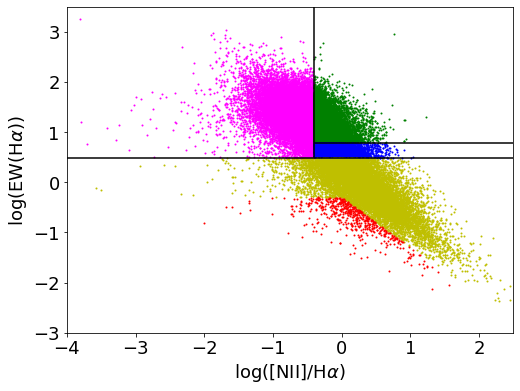

In [7]:
# checking WHAN classification
plt.plot(np.log10(SF['NIIR_FLUX']/SF['HA_FLUX']), np.log10(SF['HA_EW']), ls='', marker='o', markersize=1, 
         c='magenta')
plt.plot(np.log10(sAGN['NIIR_FLUX']/sAGN['HA_FLUX']), np.log10(sAGN['HA_EW']), ls='', marker='o', markersize=1, 
         c='g')
plt.plot(np.log10(wAGN['NIIR_FLUX']/wAGN['HA_FLUX']), np.log10(wAGN['HA_EW']), ls='', marker='o', markersize=1, 
         c='b')
plt.plot(np.log10(retired['NIIR_FLUX']/retired['HA_FLUX']), np.log10(retired['HA_EW']), ls='', marker='o', 
         markersize=1, c='y')
plt.plot(np.log10(passive['NIIR_FLUX']/passive['HA_FLUX']), np.log10(passive['HA_EW']), ls='', marker='o', 
         markersize=1, c='red')
#plt.plot(np.log10(orange_dots['NIIR_FLUX']/orange_dots['HA_FLUX']), np.log10(orange_dots['HA_EW']), ls='', 
#         marker='o', markersize=1, c='orange', alpha=0.2)

plt.axhline(np.log10(3), c='k')
plt.axhline(np.log10(6), xmin=0.555, xmax=1, c='k')
plt.axvline(-0.4, ymin=0.54, c='k')

plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.xlim(-4,2.5)
plt.ylim(-3,3.5)
plt.show()

In [8]:
SF_class = {}
SF_class['CATAID'] = SF['CATAID'].values
SF_class['WHAN classification'] = 'SF'

SF_class_df = pd.DataFrame(SF_class)


sAGN_class = {}
sAGN_class['CATAID'] = sAGN['CATAID'].values
sAGN_class['WHAN classification'] = 'sAGN'

sAGN_class_df = pd.DataFrame(sAGN_class)


wAGN_class = {}
wAGN_class['CATAID'] = wAGN['CATAID'].values
wAGN_class['WHAN classification'] = 'wAGN'

wAGN_class_df = pd.DataFrame(wAGN_class)


retired_class = {}
retired_class['CATAID'] = retired['CATAID'].values
retired_class['WHAN classification'] = 'retired'

retired_class_df = pd.DataFrame(retired_class)


passive_class = {}
passive_class['CATAID'] = passive['CATAID'].values
passive_class['WHAN classification'] = 'passive'

passive_class_df = pd.DataFrame(passive_class)


unclassified_class = {}
unclassified_class['CATAID'] = unclassified['CATAID'].values
unclassified_class['WHAN classification'] = 'unclassified'

unclassified_class_df = pd.DataFrame(unclassified_class)


classification = pd.concat([SF_class_df, sAGN_class_df, wAGN_class_df, retired_class_df, passive_class_df, unclassified_class_df])
classification_sorted = classification.sort_values(by=['CATAID'])
classification_sorted

,CATAID,WHAN classification
3690,14283,sAGN
6791,14295,unclassified
5901,14296,SF
1048,14300,wAGN
6810,14301,unclassified
...,...,...
6114,3021557,wAGN
41794,3021558,unclassified
41795,3021559,unclassified
41797,3021560,unclassified


In [9]:
# BPT classification
sf = data_BPT1[(np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) < Stasinska(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']))) & 
              (np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']) < 10)]
seyfert = data_BPT1[((np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) > Kewley(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']))) & 
                    (np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) > Schawinski(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX'])))) | 
                   ((np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']) >= 0.4) & 
                    (np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) > Schawinski(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']))))]
liners = data_BPT1[((np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) > Kewley(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']))) & 
                   (np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) < Schawinski(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX'])))) | 
                  ((np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']) >= 0.4) & 
                   (np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) < Schawinski(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']))))]
composite = data_BPT1[(np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) > Stasinska(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']))) & 
                     (np.log10(data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']) < Kewley(np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']))) & 
                     (np.log10(data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']) < 0.4)]
unclassified_bpt = data_raw[(data_raw['HA_FLUX']<=0) | 
                            (data_raw['HB_FLUX']<=0) |
                            (data_raw['NIIR_FLUX']<=0) |
                            (data_raw['OIIIR_FLUX']<=0)]

print('BPT classification')
print('Star forming:', len(sf))
print('Seyfert:', len(seyfert))
print('LINERs:', len(liners))
print('Composite:', len(composite))
print('Unclassified:', len(data_raw)-len(data_BPT1), " should be equal to ", len(unclassified_bpt))

BPT classification
Star forming: 19324
Seyfert: 7269
LINERs: 2383
Composite: 26350
Unclassified: 64142  should be equal to  64142


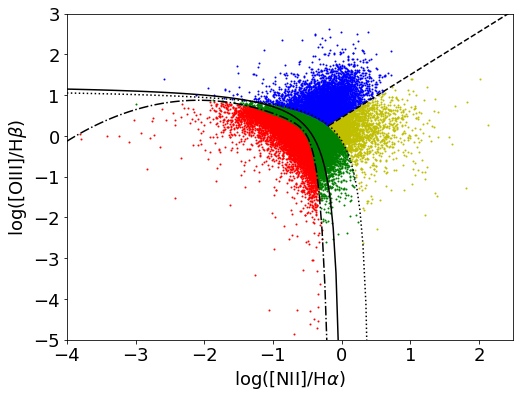

In [10]:
# checking BPT classification
plt.plot(np.log10(sf['NIIR_FLUX']/sf['HA_FLUX']), 
         np.log10(sf['OIIIR_FLUX']/sf['HB_FLUX']), ls='', marker='o', markersize=1, c='r')
plt.plot(np.log10(composite['NIIR_FLUX']/composite['HA_FLUX']), 
         np.log10(composite['OIIIR_FLUX']/composite['HB_FLUX']), ls='', marker='o', markersize=1, c='g')
plt.plot(np.log10(seyfert['NIIR_FLUX']/seyfert['HA_FLUX']), 
         np.log10(seyfert['OIIIR_FLUX']/seyfert['HB_FLUX']), ls='', marker='o', markersize=1, c='b')
plt.plot(np.log10(liners['NIIR_FLUX']/liners['HA_FLUX']), 
         np.log10(liners['OIIIR_FLUX']/liners['HB_FLUX']), ls='', marker='o', markersize=1, c='y')

xx1 = np.linspace(-4, 0.4, 100)
xx2 = np.linspace(-4, 0, 100)
xx3 = np.linspace(-4, 0, 100)
xx4 = np.linspace(-0.18, 2.5, 100)

plt.plot(xx1, Kewley(xx1), ls='dotted', c='k', label='Kewley+01')
plt.plot(xx2, Kauffmann(xx2), ls='-', c='k', label='Kauffman+03')
plt.plot(xx3, Stasinska(xx3), ls='-.', c='k', label='Stasińska+06')
plt.plot(xx4, Schawinski(xx4), ls='--', c='k', label='Schawinski+07')

plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.xlim(-4,2.5)
plt.ylim(-5,3)
plt.show()

In [11]:
sf_class = {}
sf_class['CATAID'] = sf['CATAID'].values
sf_class['BPT classification'] = 'SF'

sf_class_df = pd.DataFrame(sf_class)


seyfert_class = {}
seyfert_class['CATAID'] = seyfert['CATAID'].values
seyfert_class['BPT classification'] = 'seyfert'

seyfert_class_df = pd.DataFrame(seyfert_class)


liners_class = {}
liners_class['CATAID'] = liners['CATAID'].values
liners_class['BPT classification'] = 'LINERs'

liners_class_df = pd.DataFrame(liners_class)


composite_class = {}
composite_class['CATAID'] = composite['CATAID'].values
composite_class['BPT classification'] = 'composite'

composite_class_df = pd.DataFrame(composite_class)


unclassified_bpt_class = {}
unclassified_bpt_class['CATAID'] = unclassified_bpt['CATAID'].values
unclassified_bpt_class['BPT classification'] = 'unclassified'

unclassified_bpt_class_df = pd.DataFrame(unclassified_bpt_class)


classification_bpt = pd.concat([sf_class_df, seyfert_class_df, liners_class_df, composite_class_df, unclassified_bpt_class_df])
classification_bpt_sorted = classification_bpt.sort_values(by=['CATAID'])
classification_bpt_sorted

,CATAID,BPT classification
4387,14283,composite
10740,14295,unclassified
3222,14296,SF
10763,14300,unclassified
10770,14301,unclassified
...,...,...
26349,3021557,composite
64137,3021558,unclassified
64138,3021559,unclassified
64140,3021560,unclassified


In [12]:
final_classification = pd.merge(classification_sorted, classification_bpt_sorted, on='CATAID')
final_classification.to_csv('../../Data/classified_dataset.csv')

# Subsets

In [13]:
# NIIR OIIR
retired_NIIR_OIIR = retired[(retired['NIIR_FLUX'] > 0) & (retired['OIIR_FLUX'] > 0)]
passive_NIIR_OIIR = passive[(passive['NIIR_FLUX'] > 0) & (passive['OIIR_FLUX'] > 0)]
unclassified_NIIR_OIIR = unclassified[(unclassified['NIIR_FLUX'] > 0) & (unclassified['OIIR_FLUX'] > 0)]

# NIIR Halpha
NIIR_Ha_retired = retired[(retired['NIIR_FLUX'] > 0) & (retired['HA_FLUX'] > 0)]
NIIR_Ha_passive = passive[(passive['NIIR_FLUX'] > 0) & (passive['HA_FLUX'] > 0)]

# EW(OII 2326)
EW_OII_retired = retired[retired['OIIR_EW'] > 0]
EW_OII_passive = passive[passive['OIIR_EW'] > 0]

In [14]:
OIIIR_NIIR_retired = retired[(retired['OIIIR_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
OIIIR_NIIR_passive = passive[(passive['OIIIR_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

OIIIB_NIIR_retired = retired[(retired['OIIIB_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
OIIIB_NIIR_passive = passive[(passive['OIIIB_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

OIIR_NIIR_retired = retired[(retired['OIIR_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
OIIR_NIIR_passive = passive[(passive['OIIR_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

OIIB_NIIR_retired = retired[(retired['OIIB_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
OIIB_NIIR_passive = passive[(passive['OIIB_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

OIR_NIIR_retired = retired[(retired['OIR_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
OIR_NIIR_passive = passive[(passive['OIR_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

OIB_NIIR_retired = retired[(retired['OIB_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
OIB_NIIR_passive = passive[(passive['OIB_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

NIIB_NIIR_retired = retired[(retired['NIIB_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
NIIB_NIIR_passive = passive[(passive['NIIB_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

SIIR_NIIR_retired = retired[(retired['SIIR_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
SIIR_NIIR_passive = passive[(passive['SIIR_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

SIIB_NIIR_retired = retired[(retired['SIIB_FLUX'] > 0) & (retired['NIIR_FLUX'] > 0)]
SIIB_NIIR_passive = passive[(passive['SIIB_FLUX'] > 0) & (passive['NIIR_FLUX'] > 0)]

OIIIR_SII_retired = retired[(retired['OIIIR_FLUX'] > 0) & (retired['SIIR_FLUX'] > 0) & (retired['SIIB_FLUX'] > 0)]
OIIIR_SII_passive = passive[(passive['OIIIR_FLUX'] > 0) & (passive['SIIR_FLUX'] > 0) & (passive['SIIB_FLUX'] > 0)]

OIIIB_SII_retired = retired[(retired['OIIIB_FLUX'] > 0) & (retired['SIIR_FLUX'] > 0) & (retired['SIIB_FLUX'] > 0)]
OIIIB_SII_passive = passive[(passive['OIIIB_FLUX'] > 0) & (passive['SIIR_FLUX'] > 0) & (passive['SIIB_FLUX'] > 0)]

OIIR_SII_retired = retired[(retired['OIIR_FLUX'] > 0) & (retired['SIIR_FLUX'] > 0) & (retired['SIIB_FLUX'] > 0)]
OIIR_SII_passive = passive[(passive['OIIR_FLUX'] > 0) & (passive['SIIR_FLUX'] > 0) & (passive['SIIB_FLUX'] > 0)]

OIIB_SII_retired = retired[(retired['OIIB_FLUX'] > 0) & (retired['SIIR_FLUX'] > 0) & (retired['SIIB_FLUX'] > 0)]
OIIB_SII_passive = passive[(passive['OIIB_FLUX'] > 0) & (passive['SIIR_FLUX'] > 0) & (passive['SIIB_FLUX'] > 0)]

OIR_SII_retired = retired[(retired['OIR_FLUX'] > 0) & (retired['SIIR_FLUX'] > 0) & (retired['SIIB_FLUX'] > 0)]
OIR_SII_passive = passive[(passive['OIR_FLUX'] > 0) & (passive['SIIR_FLUX'] > 0) & (passive['SIIB_FLUX'] > 0)]

OIB_SII_retired = retired[(retired['OIB_FLUX'] > 0) & (retired['SIIR_FLUX'] > 0) & (retired['SIIB_FLUX'] > 0)]
OIB_SII_passive = passive[(passive['OIB_FLUX'] > 0) & (passive['SIIR_FLUX'] > 0) & (passive['SIIB_FLUX'] > 0)]

NIIR_SII_retired = retired[(retired['NIIR_FLUX'] > 0) & (retired['SIIR_FLUX'] > 0) & (retired['SIIB_FLUX'] > 0)]
NIIR_SII_passive = passive[(passive['NIIR_FLUX'] > 0) & (passive['SIIR_FLUX'] > 0) & (passive['SIIB_FLUX'] > 0)]

NIIB_SII_retired = retired[(retired['NIIB_FLUX'] > 0) & (retired['SIIR_FLUX'] > 0) & (retired['SIIB_FLUX'] > 0)]
NIIB_SII_passive = passive[(passive['NIIB_FLUX'] > 0) & (passive['SIIR_FLUX'] > 0) & (passive['SIIB_FLUX'] > 0)]

# BPT diagram

In [15]:
x1 = data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']
y1 = data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']

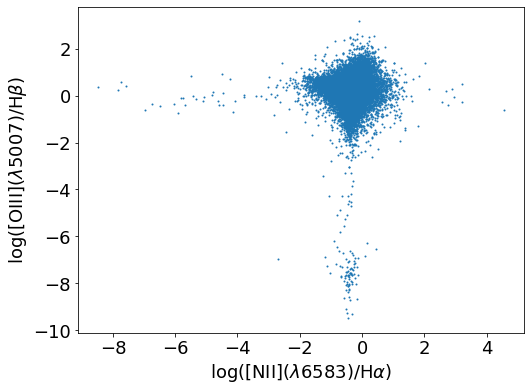

In [16]:
plt.plot(np.log10(x1), np.log10(y1), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{NII}](\lambda 6583)/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}](\lambda 5007)/\mathrm{H}\beta)$')
plt.show()

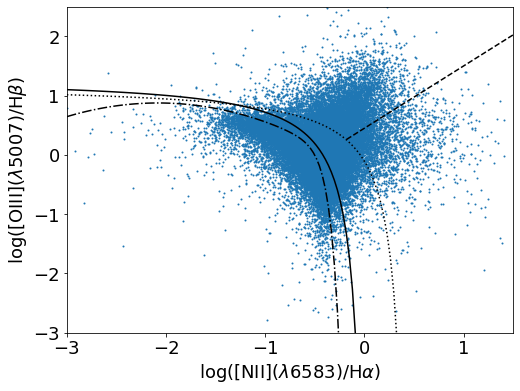

In [17]:
plt.plot(np.log10(x1), np.log10(y1), ls='', marker='o', markersize=1)

xx1 = np.linspace(-3, 0.4, 100)
xx2 = np.linspace(-3, 0, 100)
xx3 = np.linspace(-3, 0, 100)
xx4 = np.linspace(-0.18, 1.5, 100)

plt.plot(xx1, Kewley(xx1), ls='dotted', c='k', label='Kewley+01')
plt.plot(xx2, Kauffmann(xx2), ls='-', c='k', label='Kauffman+03')
plt.plot(xx3, Stasinska(xx3), ls='-.', c='k', label='Stasińska+06')
plt.plot(xx4, Schawinski(xx4), ls='--', c='k', label='Schawinski+07')

plt.xlabel(r'$\log([\mathrm{NII}](\lambda 6583)/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}](\lambda 5007)/\mathrm{H}\beta)$')
plt.xlim(-3,1.5)
plt.ylim(-3,2.5)
plt.show()

In [18]:
x2 = data_BPT2['OIB_FLUX']/data_BPT2['HA_FLUX']
y2 = data_BPT2['OIIIR_FLUX']/data_BPT2['HB_FLUX']

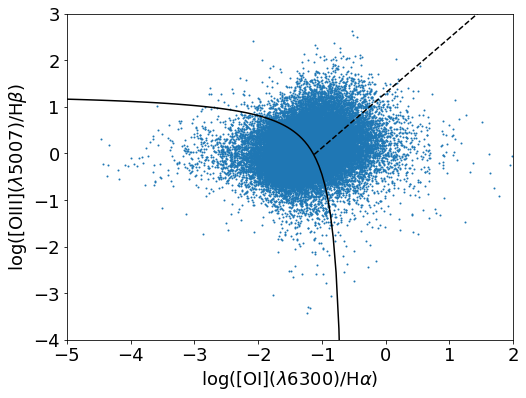

In [19]:
plt.plot(np.log10(x2), np.log10(y2), ls='', marker='o', markersize=1)

x0 = np.linspace(-5, -0.6, 100)
plt.plot(x0, main_AGN_BPT2(x0), c='k')

x0 = np.linspace(-1.12, 2, 100)
plt.plot(x0, LINER_SY2_BPT2(x0), c='k', ls='--')

plt.xlabel(r'$\log([\mathrm{OI}](\lambda 6300)/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}](\lambda 5007)/\mathrm{H}\beta)$')
plt.xlim(-5,2)
plt.ylim(-4,3)
plt.show()

In [20]:
x3 = (data_BPT3['SIIR_FLUX']+data_BPT3['SIIB_FLUX'])/data_BPT3['HA_FLUX']
y3 = data_BPT3['OIIIR_FLUX']/data_BPT3['HB_FLUX']

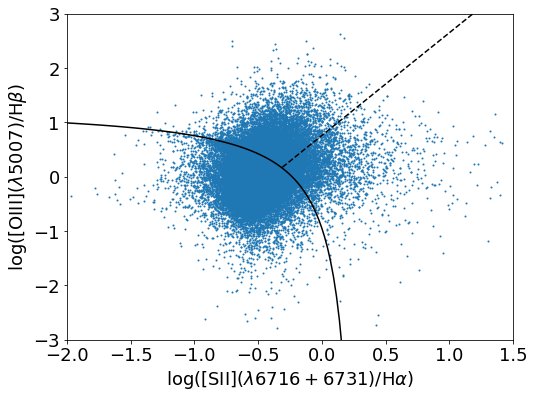

In [21]:
plt.plot(np.log10(x3), np.log10(y3), ls='', marker='o', markersize=1)

x0 = np.linspace(-2, 0.3, 100)
plt.plot(x0, main_AGN_BPT3(x0), c='k')

x0 = np.linspace(-0.31, 1.5, 100)
plt.plot(x0, LINER_SY2_BPT3(x0), c='k', ls='--')

plt.xlabel(r'$\log([\mathrm{SII}](\lambda 6716+6731)/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}](\lambda 5007)/\mathrm{H}\beta)$')
plt.xlim(-2,1.5)
plt.ylim(-3,3)
plt.show()

In [22]:
x4 = data_Stasinska1['OIIB_FLUX']/data_Stasinska1['HB_FLUX']
y4 = data_Stasinska1['OIIIR_FLUX']/data_Stasinska1['HB_FLUX']

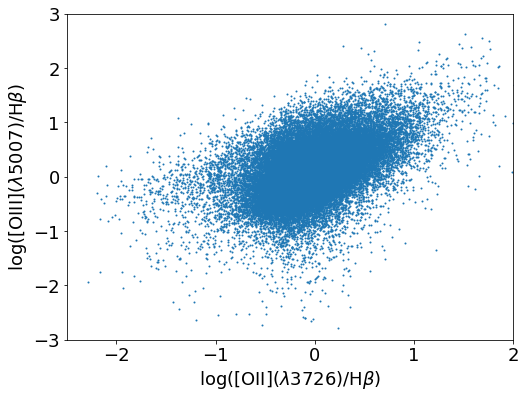

In [23]:
plt.plot(np.log10(x4), np.log10(y4), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{OII}](\lambda 3726)/\mathrm{H}\beta)$')
plt.ylabel(r'$\log([\mathrm{OIII}](\lambda 5007)/\mathrm{H}\beta)$')
plt.xlim(-2.5,2)
plt.ylim(-3,3)
plt.show()

# WHAN diagram

In [24]:
x5 = data_WHAN['NIIR_FLUX']/data_WHAN['HA_FLUX']
y5 = data_WHAN['HA_EW']

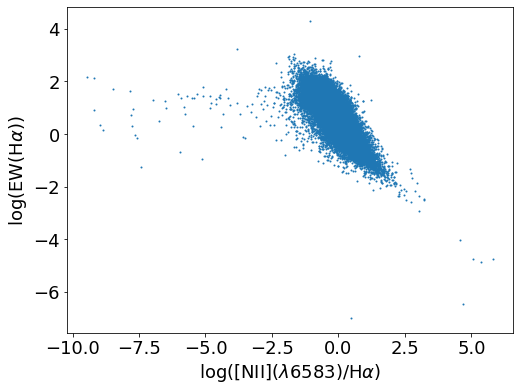

In [25]:
plt.plot(np.log10(x5), np.log10(y5), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{NII}](\lambda 6583)/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.show()

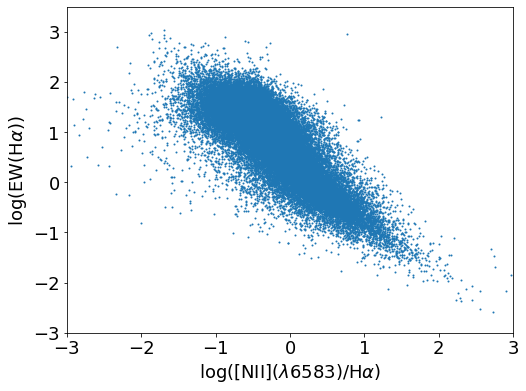

In [26]:
plt.plot(np.log10(x5), np.log10(y5), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{NII}](\lambda 6583)/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.xlim(-3,3)
plt.ylim(-3,3.5)
plt.show()

# Spectra

In [27]:
l_pivot = [1535, 2301, 3557, 4702, 6175, 7491, 8946, 8800, 10213, 12525, 16433, 21503, 
           3.37*10**4, 4.62*10**4, 12.1*10**4, 22.8*10**4, 101*10**4, 161*10**4, 249*10**4, 357*10**4, 504*10**4]
flux = [max(data_raw['DFAflux_GALEXFUV']), max(data_raw['DFAflux_GALEXNUV']), max(data_raw['DFAflux_SDSSu']), 
        max(data_raw['DFAflux_SDSSg']), max(data_raw['DFAflux_SDSSr']), max(data_raw['DFAflux_SDSSi']), 
        max(data_raw['DFAflux_SDSSz']), max(data_raw['DFAflux_VIKINGZ']), max(data_raw['DFAflux_VIKINGY']), 
        max(data_raw['DFAflux_VIKINGJ']), max(data_raw['DFAflux_VIKINGH']), max(data_raw['DFAflux_VIKINGK']), 
        max(data_raw['DFAflux_WISEW1']), max(data_raw['DFAflux_WISEW2']), max(data_raw['DFAflux_WISEW3']), 
        max(data_raw['DFAflux_WISEW4']), max(data_raw['DFAflux_PACS100']), max(data_raw['DFAflux_PACS160']), 
        max(data_raw['DFAflux_SPIRE250']), max(data_raw['DFAflux_SPIRE350']), max(data_raw['DFAflux_SPIRE500'])]

Text(0, 0.5, '$\\log(F)$ (Jy)')

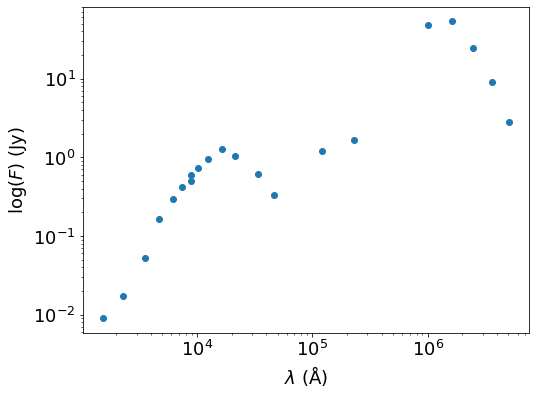

In [28]:
plt.scatter(l_pivot, flux)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\lambda$ ($\mathrm{\AA}$)')
plt.ylabel(r'$\log(F)$ (Jy)')

# Plots

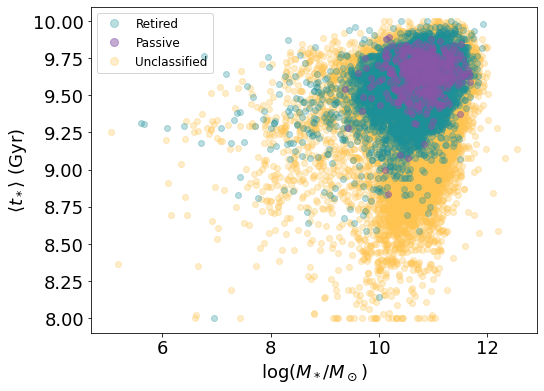

In [29]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['ager_percentile50'], ls='', marker='o', markersize=6, c=palette_darker[1], 
         alpha=0.3, label='Retired', zorder=10)
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['ager_percentile50'], ls='', marker='o', markersize=6, c=palette_darker[0], 
         alpha=0.5, label='Passive', zorder=15)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['ager_percentile50'], ls='', marker='o', 
         markersize=6, c=palette_darker[2], alpha=0.3, label='Unclassified', zorder=6)


#plt.xlim(9,12.0)
#plt.ylim(8.5,10.1)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$\left< t_* \right>$ (Gyr)')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

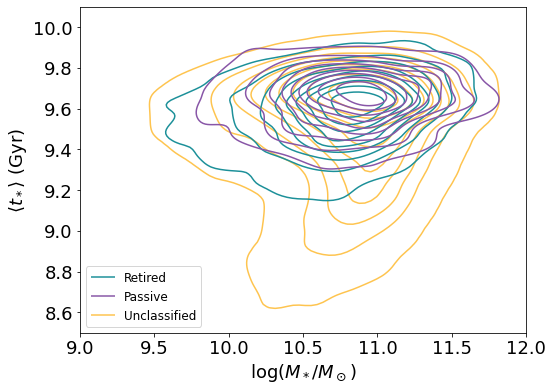

In [30]:
sns.kdeplot(x=np.log10(retired['mass_stellar_best_fit']), y=retired['ager_percentile50'], color=palette_darker[1], 
            label='Retired', zorder=10)
sns.kdeplot(x=np.log10(passive['mass_stellar_best_fit']), y=passive['ager_percentile50'], color=palette_darker[0], 
            label='Passive', zorder=15)
sns.kdeplot(x=np.log10(unclassified['mass_stellar_best_fit']), y=unclassified['ager_percentile50'], 
            color=palette_darker[2], label='Unclassified', zorder=5)

plt.xlim(9,12.0)
plt.ylim(8.5,10.1)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$\left< t_* \right>$ (Gyr)')

plt.legend(loc='lower left')
plt.show()

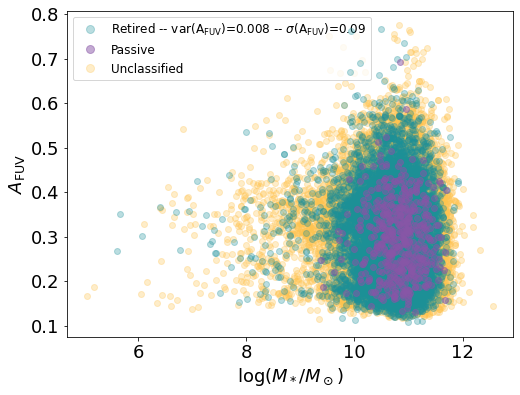

In [31]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['A_FUV'], ls='', marker='o', markersize=6, 
         c=palette_darker[1], alpha=0.3, label=r"Retired -- var(A$_{\rm{FUV}}$)=%.3f -- $\sigma$(A$_{\rm{FUV}}$)=%.2f" % 
         (np.var(retired['A_FUV'].values), np.std(retired['A_FUV'].values)), zorder=10)
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['A_FUV'], ls='', marker='o', markersize=6, c=palette_darker[0], 
         alpha=0.5, label='Passive', zorder=15)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['A_FUV'], ls='', marker='o', markersize=6, 
         c=palette_darker[2], alpha=0.3, label='Unclassified', zorder=5)

#plt.xlim(9,12)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_\mathrm{FUV}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

In [32]:
np.var(retired['A_FUV'].values)

0.007735506059277387

In [119]:
bins = np.arange(8, 12., 0.5)
retired.reset_index()
passive.reset_index()
unclassified.reset_index()

# A_FUV
A_FUV_025r = []
A_FUV_25r = []
A_FUV_50r = []
A_FUV_75r = []
A_FUV_975r = []
mass_50r = []

A_FUV_025p = []
A_FUV_25p = []
A_FUV_50p = []
A_FUV_75p = []
A_FUV_975p = []
mass_50p = []

A_FUV_025u = []
A_FUV_25u = []
A_FUV_50u = []
A_FUV_75u = []
A_FUV_975u = []
mass_50u = []

# A_NUV
A_NUV_025r = []
A_NUV_25r = []
A_NUV_50r = []
A_NUV_75r = []
A_NUV_975r = []

A_NUV_025p = []
A_NUV_25p = []
A_NUV_50p = []
A_NUV_75p = []
A_NUV_975p = []

A_NUV_025u = []
A_NUV_25u = []
A_NUV_50u = []
A_NUV_75u = []
A_NUV_975u = []

# A_r
A_r_025r = []
A_r_25r = []
A_r_50r = []
A_r_75r = []
A_r_975r = []

A_r_025p = []
A_r_25p = []
A_r_50p = []
A_r_75p = []
A_r_975p = []

A_r_025u = []
A_r_25u = []
A_r_50u = []
A_r_75u = []
A_r_975u = []

# A_KU
A_KU_025r = []
A_KU_25r = []
A_KU_50r = []
A_KU_75r = []
A_KU_975r = []

A_KU_025p = []
A_KU_25p = []
A_KU_50p = []
A_KU_75p = []
A_KU_975p = []

A_KU_025u = []
A_KU_25u = []
A_KU_50u = []
A_KU_75u = []
A_KU_975u = []

# A_KV
A_KV_025r = []
A_KV_25r = []
A_KV_50r = []
A_KV_75r = []
A_KV_975r = []

A_KV_025p = []
A_KV_25p = []
A_KV_50p = []
A_KV_75p = []
A_KV_975p = []

A_KV_025u = []
A_KV_25u = []
A_KV_50u = []
A_KV_75u = []
A_KV_975u = []

# W_3-W_2
retiredW = retired[(retired['ABMagDFA_WISEW3'] > 0) & (retired['ABMagDFA_WISEW2'] > 0)]
retiredW.reset_index()
passiveW = passive[(passive['ABMagDFA_WISEW3'] > 0) & (passive['ABMagDFA_WISEW2'] > 0)]
passiveW.reset_index()
unclassifiedW = unclassified[(unclassified['ABMagDFA_WISEW3'] > 0) & (unclassified['ABMagDFA_WISEW2'] > 0)]
unclassifiedW.reset_index()
W3W2_025r = []
W3W2_25r = []
W3W2_50r = []
W3W2_75r = []
W3W2_975r = []
massW_50r = []

W3W2_025p = []
W3W2_25p = []
W3W2_50p = []
W3W2_75p = []
W3W2_975p = []
massW_50p = []

W3W2_025u = []
W3W2_25u = []
W3W2_50u = []
W3W2_75u = []
W3W2_975u = []
massW_50u = []

# NUV-r
retiredN = retired[(retired['ABMagDFA_GALEXNUV'] > 0) & (retired['ABMagDFA_SDSSr'] > 0)]
retiredN.reset_index()
passiveN = passive[(passive['ABMagDFA_GALEXNUV'] > 0) & (passive['ABMagDFA_SDSSr'] > 0)]
passiveN.reset_index()
unclassifiedN = unclassified[(unclassified['ABMagDFA_GALEXNUV'] > 0) & (unclassified['ABMagDFA_SDSSr'] > 0)]
unclassifiedN.reset_index()
NUVr_025r = []
NUVr_25r = []
NUVr_50r = []
NUVr_75r = []
NUVr_975r = []
massN_50r = []

NUVr_025p = []
NUVr_25p = []
NUVr_50p = []
NUVr_75p = []
NUVr_975p = []
massN_50p = []

NUVr_025u = []
NUVr_25u = []
NUVr_50u = []
NUVr_75u = []
NUVr_975u = []
massN_50u = []

# Z/Z_sun
Z_025r = []
Z_25r = []
Z_50r = []
Z_75r = []
Z_975r = []

Z_025p = []
Z_25p = []
Z_50p = []
Z_75p = []
Z_975p = []

Z_025u = []
Z_25u = []
Z_50u = []
Z_75u = []
Z_975u = []

# Dn4000
retiredD = retired[(retired['D4000N'] > 0)]
retiredD.reset_index()
passiveD = passive[(passive['D4000N'] > 0)]
passiveD.reset_index()
unclassifiedD = unclassified[(unclassified['D4000N'] > 0)]
unclassifiedD.reset_index()
Dn4000_025r = []
Dn4000_25r = []
Dn4000_50r = []
Dn4000_75r = []
Dn4000_975r = []
massD_50r = []

Dn4000_025p = []
Dn4000_25p = []
Dn4000_50p = []
Dn4000_75p = []
Dn4000_975p = []
massD_50p = []

Dn4000_025u = []
Dn4000_25u = []
Dn4000_50u = []
Dn4000_75u = []
Dn4000_975u = []
massD_50u = []

for i in bins:
    # A_FUV
    A_FUVr = []
    mass_r = []
    
    A_FUVu = []
    mass_u = []
    
    # A_NUV
    A_NUVr = []
    A_NUVu = []
    
    # A_r
    A_rr = []
    A_ru = []
    
    # A_KU
    A_KUr = []
    A_KUu = []
    
    # A_KV
    A_KVr = []
    A_KVu = []
    
    # W3-W2
    W3W2r = []
    W3W2u = []
    massW_r = []
    massW_u = []
    
    # NUV-r
    NUVrr = []
    NUVru = []
    massN_r = []
    massN_u = []
    
    # Z/Z_sun
    Zr = []
    Zu = []
    
    # Dn4000
    Dn4000r = []
    Dn4000u = []
    massD_r = []
    massD_u = []
    
    for j in range(0, len(retired)):
        if (retired['mass_stellar_best_fit'][retired.index[j]] > 10**i) & (retired['mass_stellar_best_fit'][retired.index[j]] <= 10**(i+0.5)):
            A_FUVr.append(retired['A_FUV'][retired.index[j]])
            mass_r.append(retired['mass_stellar_best_fit'][retired.index[j]])
            
            A_NUVr.append(retired['A_NUV'][retired.index[j]])
            A_rr.append(retired['A_r'][retired.index[j]])
            A_KUr.append(retired['A_K_UKIDSS'][retired.index[j]])
            A_KVr.append(retired['A_K_VIKING'][retired.index[j]])
            Zr.append(retired['metalicity_Z_Zo_percentile50'][retired.index[j]])
        
    for j in range(0, len(retiredW)):
        if (retiredW['mass_stellar_best_fit'][retiredW.index[j]] > 10**i) & (retiredW['mass_stellar_best_fit'][retiredW.index[j]] <= 10**(i+0.5)):
            W3W2r.append(retiredW['ABMagDFA_WISEW3'][retiredW.index[j]]-retiredW['ABMagDFA_WISEW2'][retiredW.index[j]])
            massW_r.append(retiredW['mass_stellar_best_fit'][retiredW.index[j]])
            
    for j in range(0, len(retiredN)):
        if (retiredN['mass_stellar_best_fit'][retiredN.index[j]] > 10**i) & (retiredN['mass_stellar_best_fit'][retiredN.index[j]] <= 10**(i+0.5)):
            NUVrr.append(retiredN['ABMagDFA_GALEXNUV'][retiredN.index[j]]-retiredN['ABMagDFA_SDSSr'][retiredN.index[j]])
            massN_r.append(retiredN['mass_stellar_best_fit'][retiredN.index[j]])
            
    for j in range(0, len(retiredD)):
        if (retiredD['mass_stellar_best_fit'][retiredD.index[j]] > 10**i) & (retiredD['mass_stellar_best_fit'][retiredD.index[j]] <= 10**(i+0.5)):
            Dn4000r.append(retiredD['D4000N'][retiredD.index[j]])
            massD_r.append(retiredD['mass_stellar_best_fit'][retiredD.index[j]])
            
    A_FUVr_df = pd.DataFrame(A_FUVr)
    A_FUV_025r.append(A_FUVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_FUV_25r.append(A_FUVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_FUV_50r.append(A_FUVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_FUV_75r.append(A_FUVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_FUV_975r.append(A_FUVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    mass_r_df = pd.DataFrame(mass_r)
    mass_50r.append(mass_r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    
    A_NUVr_df = pd.DataFrame(A_NUVr)
    A_NUV_025r.append(A_NUVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_NUV_25r.append(A_NUVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_NUV_50r.append(A_NUVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_NUV_75r.append(A_NUVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_NUV_975r.append(A_NUVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_rr_df = pd.DataFrame(A_rr)
    A_r_025r.append(A_rr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_r_25r.append(A_rr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_r_50r.append(A_rr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_r_75r.append(A_rr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_r_975r.append(A_rr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_KUr_df = pd.DataFrame(A_KUr)
    A_KU_025r.append(A_KUr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_KU_25r.append(A_KUr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_KU_50r.append(A_KUr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_KU_75r.append(A_KUr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_KU_975r.append(A_KUr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_KVr_df = pd.DataFrame(A_KUr)
    A_KV_025r.append(A_KVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_KV_25r.append(A_KVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_KV_50r.append(A_KVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_KV_75r.append(A_KVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_KV_975r.append(A_KVr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    W3W2r_df = pd.DataFrame(W3W2r)
    W3W2_025r.append(W3W2r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    W3W2_25r.append(W3W2r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    W3W2_50r.append(W3W2r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    W3W2_75r.append(W3W2r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    W3W2_975r.append(W3W2r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    massW_r_df = pd.DataFrame(massW_r)
    massW_50r.append(massW_r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    
    NUVrr_df = pd.DataFrame(NUVrr)
    NUVr_025r.append(NUVrr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    NUVr_25r.append(NUVrr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    NUVr_50r.append(NUVrr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    NUVr_75r.append(NUVrr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    NUVr_975r.append(NUVrr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    massN_r_df = pd.DataFrame(massN_r)
    massN_50r.append(massN_r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    
    Zr_df = pd.DataFrame(Zr)
    Z_025r.append(Zr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    Z_25r.append(Zr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    Z_50r.append(Zr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    Z_75r.append(Zr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    Z_975r.append(Zr_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    Dn4000r_df = pd.DataFrame(Dn4000r)
    Dn4000_025r.append(Dn4000r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    Dn4000_25r.append(Dn4000r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    Dn4000_50r.append(Dn4000r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    Dn4000_75r.append(Dn4000r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    Dn4000_975r.append(Dn4000r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    massD_r_df = pd.DataFrame(massD_r)
    massD_50r.append(massD_r_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    
    for j in range(0, len(unclassified)):
        if (unclassified['mass_stellar_best_fit'][unclassified.index[j]] > 10**i) & (unclassified['mass_stellar_best_fit'][unclassified.index[j]] <= 10**(i+0.5)):
            A_FUVu.append(unclassified['A_FUV'][unclassified.index[j]])
            mass_u.append(unclassified['mass_stellar_best_fit'][unclassified.index[j]])
            
            A_NUVu.append(unclassified['A_NUV'][unclassified.index[j]])
            A_ru.append(unclassified['A_r'][unclassified.index[j]])
            A_KUu.append(unclassified['A_K_UKIDSS'][unclassified.index[j]])
            A_KVu.append(unclassified['A_K_VIKING'][unclassified.index[j]])
            Zu.append(unclassified['metalicity_Z_Zo_percentile50'][unclassified.index[j]])
            
    for j in range(0, len(unclassifiedW)):
        if (unclassifiedW['mass_stellar_best_fit'][unclassifiedW.index[j]] > 10**i) & (unclassifiedW['mass_stellar_best_fit'][unclassifiedW.index[j]] <= 10**(i+0.5)):
            W3W2u.append(unclassifiedW['ABMagDFA_WISEW3'][unclassifiedW.index[j]]-unclassifiedW['ABMagDFA_WISEW2'][unclassifiedW.index[j]])
            massW_u.append(unclassifiedW['mass_stellar_best_fit'][unclassifiedW.index[j]])
            
    for j in range(0, len(unclassifiedN)):
        if (unclassifiedN['mass_stellar_best_fit'][unclassifiedN.index[j]] > 10**i) & (unclassifiedN['mass_stellar_best_fit'][unclassifiedN.index[j]] <= 10**(i+0.5)):
            NUVru.append(unclassifiedN['ABMagDFA_GALEXNUV'][unclassifiedN.index[j]]-unclassifiedN['ABMagDFA_SDSSr'][unclassifiedN.index[j]])
            massN_u.append(unclassifiedN['mass_stellar_best_fit'][unclassifiedN.index[j]])
    
    for j in range(0, len(unclassifiedD)):
        if (unclassifiedD['mass_stellar_best_fit'][unclassifiedD.index[j]] > 10**i) & (unclassifiedD['mass_stellar_best_fit'][unclassifiedD.index[j]] <= 10**(i+0.5)):
            Dn4000u.append(unclassifiedD['D4000N'][unclassifiedD.index[j]])
            massD_u.append(unclassifiedD['mass_stellar_best_fit'][unclassifiedD.index[j]])
    
    A_FUVu_df = pd.DataFrame(A_FUVu)
    A_FUV_025u.append(A_FUVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_FUV_25u.append(A_FUVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_FUV_50u.append(A_FUVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_FUV_75u.append(A_FUVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_FUV_975u.append(A_FUVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    mass_u_df = pd.DataFrame(mass_u)
    mass_50u.append(mass_u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    
    A_NUVu_df = pd.DataFrame(A_NUVu)
    A_NUV_025u.append(A_NUVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_NUV_25u.append(A_NUVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_NUV_50u.append(A_NUVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_NUV_75u.append(A_NUVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_NUV_975u.append(A_NUVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_ru_df = pd.DataFrame(A_ru)
    A_r_025u.append(A_ru_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_r_25u.append(A_ru_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_r_50u.append(A_ru_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_r_75u.append(A_ru_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_r_975u.append(A_ru_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_KUu_df = pd.DataFrame(A_KUu)
    A_KU_025u.append(A_KUu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_KU_25u.append(A_KUu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_KU_50u.append(A_KUu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_KU_75u.append(A_KUu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_KU_975u.append(A_KUu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_KVu_df = pd.DataFrame(A_KVu)
    A_KV_025u.append(A_KVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_KV_25u.append(A_KVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_KV_50u.append(A_KVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_KV_75u.append(A_KVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_KV_975u.append(A_KVu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    W3W2u_df = pd.DataFrame(W3W2u)
    W3W2_025u.append(W3W2u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    W3W2_25u.append(W3W2u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    W3W2_50u.append(W3W2u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    W3W2_75u.append(W3W2u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    W3W2_975u.append(W3W2u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    massW_u_df = pd.DataFrame(massW_u)
    massW_50u.append(massW_u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    
    NUVru_df = pd.DataFrame(NUVru)
    NUVr_025u.append(NUVru_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    NUVr_25u.append(NUVru_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    NUVr_50u.append(NUVru_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    NUVr_75u.append(NUVru_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    NUVr_975u.append(NUVru_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    massN_u_df = pd.DataFrame(massN_u)
    massN_50u.append(massN_u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    
    Zu_df = pd.DataFrame(Zu)
    Z_025u.append(Zu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    Z_25u.append(Zu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    Z_50u.append(Zu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    Z_75u.append(Zu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    Z_975u.append(Zu_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    Dn4000u_df = pd.DataFrame(Dn4000u)
    Dn4000_025u.append(Dn4000u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    Dn4000_25u.append(Dn4000u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    Dn4000_50u.append(Dn4000u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    Dn4000_75u.append(Dn4000u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    Dn4000_975u.append(Dn4000u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    massD_u_df = pd.DataFrame(massD_u)
    massD_50u.append(massD_u_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    

bins = np.arange(9, 12., 0.5)
for i in bins:
    # A_FUV
    A_FUVp = []
    mass_p = []
    
    # A_NUV
    A_NUVp = []
    
    # A_r
    A_rp = []
    
    # A_KU
    A_KUp = []
    
    # A_KV
    A_KVp = []
    
    # W3-W2
    W3W2p = []
    massW_p = []
    
    # NUV-r
    NUVrp = []
    massN_p = []
    
    # Z/Z_sun
    Zp = []
    
    # Dn4000
    Dn4000p = []
    massD_p = []
    
    for j in range(0, len(passive)):
        if (passive['mass_stellar_best_fit'][passive.index[j]] > 10**i) & (passive['mass_stellar_best_fit'][passive.index[j]] <= 10**(i+0.5)):
            A_FUVp.append(passive['A_FUV'][passive.index[j]])
            mass_p.append(passive['mass_stellar_best_fit'][passive.index[j]])
            
            A_NUVp.append(passive['A_NUV'][passive.index[j]])
            A_rp.append(passive['A_r'][passive.index[j]])
            A_KUp.append(passive['A_K_UKIDSS'][passive.index[j]])
            A_KVp.append(passive['A_K_VIKING'][passive.index[j]])
            Zp.append(passive['metalicity_Z_Zo_percentile50'][passive.index[j]])
            
    for j in range(0, len(passiveW)):
        if (passiveW['mass_stellar_best_fit'][passiveW.index[j]] > 10**i) & (passiveW['mass_stellar_best_fit'][passiveW.index[j]] <= 10**(i+0.5)):
            W3W2p.append(passiveW['ABMagDFA_WISEW3'][passiveW.index[j]]-passiveW['ABMagDFA_WISEW2'][passiveW.index[j]])
            massW_p.append(passiveW['mass_stellar_best_fit'][passiveW.index[j]])
            
    for j in range(0, len(passiveN)):
        if (passiveN['mass_stellar_best_fit'][passiveN.index[j]] > 10**i) & (passiveN['mass_stellar_best_fit'][passiveN.index[j]] <= 10**(i+0.5)):
            NUVrp.append(passiveN['ABMagDFA_GALEXNUV'][passiveN.index[j]]-passiveN['ABMagDFA_SDSSr'][passiveN.index[j]])
            massN_p.append(passiveN['mass_stellar_best_fit'][passiveN.index[j]])
    
    for j in range(0, len(passiveD)):
        if (passiveD['mass_stellar_best_fit'][passiveD.index[j]] > 10**i) & (passiveD['mass_stellar_best_fit'][passiveD.index[j]] <= 10**(i+0.5)):
            Dn4000p.append(passiveD['D4000N'][passiveD.index[j]])
            massD_p.append(passiveD['mass_stellar_best_fit'][passiveD.index[j]])
    
    A_FUVp_df = pd.DataFrame(A_FUVp)
    A_FUV_025p.append(A_FUVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_FUV_25p.append(A_FUVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_FUV_50p.append(A_FUVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_FUV_75p.append(A_FUVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_FUV_975p.append(A_FUVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])

    mass_p_df = pd.DataFrame(mass_p)
    mass_50p.append(mass_p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    
    A_NUVp_df = pd.DataFrame(A_NUVp)
    A_NUV_025p.append(A_NUVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_NUV_25p.append(A_NUVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_NUV_50p.append(A_NUVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_NUV_75p.append(A_NUVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_NUV_975p.append(A_NUVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_rp_df = pd.DataFrame(A_rp)
    A_r_025p.append(A_rp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_r_25p.append(A_rp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_r_50p.append(A_rp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_r_75p.append(A_rp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_r_975p.append(A_rp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_KUp_df = pd.DataFrame(A_KUp)
    A_KU_025p.append(A_KUp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_KU_25p.append(A_KUp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_KU_50p.append(A_KUp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_KU_75p.append(A_KUp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_KU_975p.append(A_KUp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    A_KVp_df = pd.DataFrame(A_KVp)
    A_KV_025p.append(A_KVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    A_KV_25p.append(A_KVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    A_KV_50p.append(A_KVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    A_KV_75p.append(A_KVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    A_KV_975p.append(A_KVp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    W3W2p_df = pd.DataFrame(W3W2p)
    W3W2_025p.append(W3W2p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    W3W2_25p.append(W3W2p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    W3W2_50p.append(W3W2p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    W3W2_75p.append(W3W2p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    W3W2_975p.append(W3W2p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    massW_p_df = pd.DataFrame(massW_p)
    massW_50p.append(massW_p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    
    NUVrp_df = pd.DataFrame(NUVrp)
    NUVr_025p.append(NUVrp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    NUVr_25p.append(NUVrp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    NUVr_50p.append(NUVrp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    NUVr_75p.append(NUVrp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    NUVr_975p.append(NUVrp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    massN_p_df = pd.DataFrame(massN_p)
    massN_50p.append(massN_p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    
    Zp_df = pd.DataFrame(Zp)
    Z_025p.append(Zp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    Z_25p.append(Zp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    Z_50p.append(Zp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    Z_75p.append(Zp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    Z_975p.append(Zp_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    Dn4000p_df = pd.DataFrame(Dn4000p)
    Dn4000_025p.append(Dn4000p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['2.5%'])
    Dn4000_25p.append(Dn4000p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['25%'])
    Dn4000_50p.append(Dn4000p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])
    Dn4000_75p.append(Dn4000p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['75%'])
    Dn4000_975p.append(Dn4000p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['97.5%'])
    
    massD_p_df = pd.DataFrame(massD_p)
    massD_50p.append(massD_p_df[0].describe(percentiles=(0.025, 0.25, 0.5, 0.75, 0.975))['50%'])


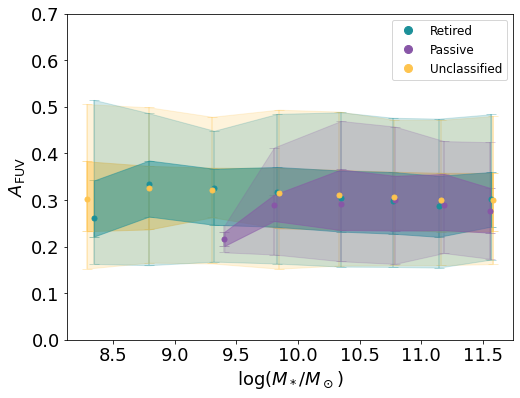

In [35]:
plt.plot(np.log10(mass_50r), A_FUV_50r, ls='', marker='o', markersize=5, c=palette_darker[1], label='Retired', 
         zorder=20)
plt.plot(np.log10(mass_50p), A_FUV_50p, ls='', marker='o', markersize=5, c=palette_darker[0], label='Passive', 
         zorder=20)
plt.plot(np.log10(mass_50u), A_FUV_50u, ls='', marker='o', markersize=5, c=palette_darker[2], 
         label='Unclassified', zorder=20)

plt.errorbar(np.log10(mass_50r), A_FUV_50r, 
             yerr=[np.array(A_FUV_50r)-np.array(A_FUV_025r), np.array(A_FUV_975r)-np.array(A_FUV_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.3)
plt.errorbar(np.log10(mass_50r), A_FUV_50r, 
             yerr=[np.array(A_FUV_50r)-np.array(A_FUV_25r), np.array(A_FUV_75r)-np.array(A_FUV_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.5)

plt.fill_between(np.log10(mass_50r), A_FUV_25r, A_FUV_75r, color=palette[1], alpha=0.5, zorder=10)
plt.fill_between(np.log10(mass_50r), A_FUV_025r, A_FUV_975r, color=palette[1], alpha=0.2, zorder=10)

plt.errorbar(np.log10(mass_50p), A_FUV_50p, 
             yerr=[np.array(A_FUV_50p)-np.array(A_FUV_025p), np.array(A_FUV_975p)-np.array(A_FUV_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.3)
plt.errorbar(np.log10(mass_50p), A_FUV_50p, 
             yerr=[np.array(A_FUV_50p)-np.array(A_FUV_25p), np.array(A_FUV_75p)-np.array(A_FUV_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.5)

plt.fill_between(np.log10(mass_50p), A_FUV_25p, A_FUV_75p, color=palette[0], alpha=0.5, zorder=15)
plt.fill_between(np.log10(mass_50p), A_FUV_025p, A_FUV_975p, color=palette[0], alpha=0.2, zorder=15)

plt.errorbar(np.log10(mass_50u), A_FUV_50u, 
             yerr=[np.array(A_FUV_50u)-np.array(A_FUV_025u), np.array(A_FUV_975u)-np.array(A_FUV_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.3)
plt.errorbar(np.log10(mass_50u), A_FUV_50u, 
             yerr=[np.array(A_FUV_50u)-np.array(A_FUV_25u), np.array(A_FUV_75u)-np.array(A_FUV_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.5)

plt.fill_between(np.log10(mass_50u), A_FUV_25u, A_FUV_75u, color=palette[2], alpha=0.5, zorder=5)
plt.fill_between(np.log10(mass_50u), A_FUV_025u, A_FUV_975u, color=palette[2], alpha=0.2, zorder=5)

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_\mathrm{FUV}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
plt.ylim([0,0.7])
plt.show()

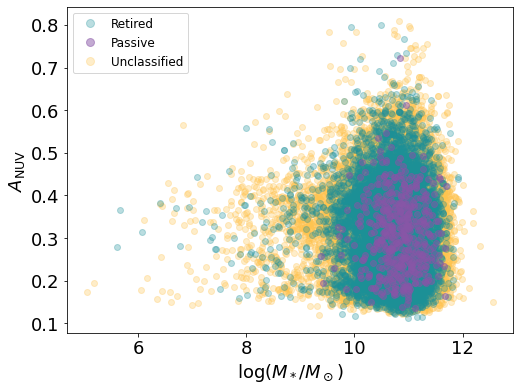

In [36]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['A_NUV'], ls='', marker='o', markersize=6, 
         c=palette_darker[1], alpha=0.3, label='Retired', zorder=10)
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['A_NUV'], ls='', marker='o', markersize=6, 
         c=palette_darker[0], alpha=0.5, label='Passive', zorder=15)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['A_NUV'], ls='', marker='o', markersize=6, 
         c=palette_darker[2], alpha=0.3, label='Unclassified', zorder=5)

#plt.xlim(9,12)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_\mathrm{NUV}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

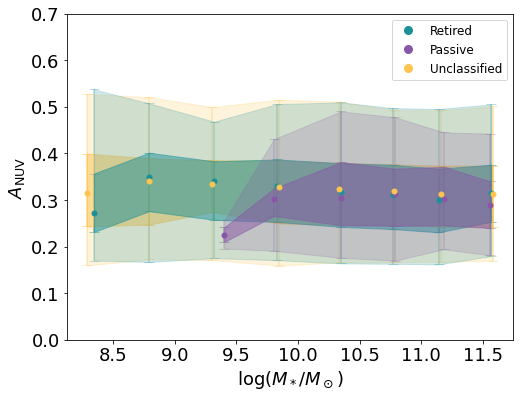

In [37]:
plt.plot(np.log10(mass_50r), A_NUV_50r, ls='', marker='o', markersize=5, c=palette_darker[1], label='Retired', 
         zorder=20)
plt.plot(np.log10(mass_50p), A_NUV_50p, ls='', marker='o', markersize=5, c=palette_darker[0], label='Passive', 
         zorder=20)
plt.plot(np.log10(mass_50u), A_NUV_50u, ls='', marker='o', markersize=5, c=palette_darker[2], 
         label='Unclassified', zorder=20)

plt.errorbar(np.log10(mass_50r), A_NUV_50r, 
             yerr=[np.array(A_NUV_50r)-np.array(A_NUV_025r), np.array(A_NUV_975r)-np.array(A_NUV_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.3)
plt.errorbar(np.log10(mass_50r), A_NUV_50r, 
             yerr=[np.array(A_NUV_50r)-np.array(A_NUV_25r), np.array(A_NUV_75r)-np.array(A_NUV_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.5)

plt.fill_between(np.log10(mass_50r), A_NUV_25r, A_NUV_75r, color=palette[1], alpha=0.5, zorder=10)
plt.fill_between(np.log10(mass_50r), A_NUV_025r, A_NUV_975r, color=palette[1], alpha=0.2, zorder=10)

plt.errorbar(np.log10(mass_50p), A_NUV_50p, 
             yerr=[np.array(A_NUV_50p)-np.array(A_NUV_025p), np.array(A_NUV_975p)-np.array(A_NUV_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.3)
plt.errorbar(np.log10(mass_50p), A_NUV_50p, 
             yerr=[np.array(A_NUV_50p)-np.array(A_NUV_25p), np.array(A_NUV_75p)-np.array(A_NUV_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.5)

plt.fill_between(np.log10(mass_50p), A_NUV_25p, A_NUV_75p, color=palette[0], alpha=0.5, zorder=15)
plt.fill_between(np.log10(mass_50p), A_NUV_025p, A_NUV_975p, color=palette[0], alpha=0.2, zorder=15)

plt.errorbar(np.log10(mass_50u), A_NUV_50u, 
             yerr=[np.array(A_NUV_50u)-np.array(A_NUV_025u), np.array(A_NUV_975u)-np.array(A_NUV_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.3)
plt.errorbar(np.log10(mass_50u), A_NUV_50u, 
             yerr=[np.array(A_NUV_50u)-np.array(A_NUV_25u), np.array(A_NUV_75u)-np.array(A_NUV_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.5)

plt.fill_between(np.log10(mass_50u), A_NUV_25u, A_NUV_75u, color=palette[2], alpha=0.5, zorder=5)
plt.fill_between(np.log10(mass_50u), A_NUV_025u, A_NUV_975u, color=palette[2], alpha=0.2, zorder=5)

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_\mathrm{NUV}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
plt.ylim([0,0.7])
plt.show()

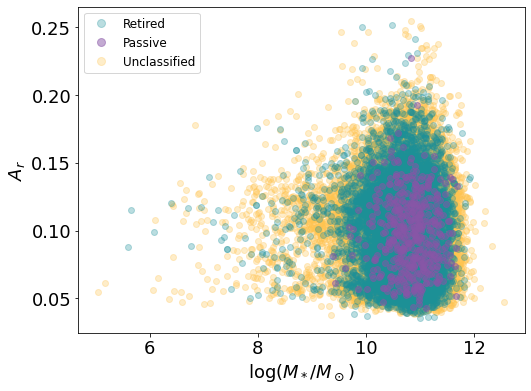

In [38]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['A_r'], ls='', marker='o', markersize=6, 
         c=palette_darker[1], alpha=0.3, label='Retired', zorder=10)
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['A_r'], ls='', marker='o', markersize=6, 
         c=palette_darker[0], alpha=0.5, label='Passive', zorder=15)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['A_r'], ls='', marker='o', markersize=6, 
         c=palette_darker[2], alpha=0.3, label='Unclassified', zorder=5)

#plt.xlim(9,12)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{r}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

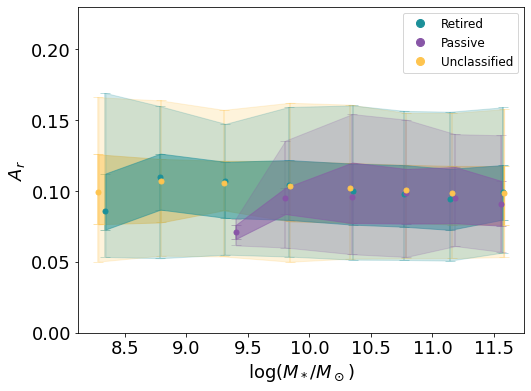

In [39]:
plt.plot(np.log10(mass_50r), A_r_50r, ls='', marker='o', markersize=5, c=palette_darker[1], label='Retired', 
         zorder=20)
plt.plot(np.log10(mass_50p), A_r_50p, ls='', marker='o', markersize=5, c=palette_darker[0], label='Passive', 
         zorder=20)
plt.plot(np.log10(mass_50u), A_r_50u, ls='', marker='o', markersize=5, c=palette_darker[2], 
         label='Unclassified', zorder=20)

plt.errorbar(np.log10(mass_50r), A_r_50r, 
             yerr=[np.array(A_r_50r)-np.array(A_r_025r), np.array(A_r_975r)-np.array(A_r_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.3)
plt.errorbar(np.log10(mass_50r), A_r_50r, 
             yerr=[np.array(A_r_50r)-np.array(A_r_25r), np.array(A_r_75r)-np.array(A_r_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.5)

plt.fill_between(np.log10(mass_50r), A_r_25r, A_r_75r, color=palette[1], alpha=0.5, zorder=10)
plt.fill_between(np.log10(mass_50r), A_r_025r, A_r_975r, color=palette[1], alpha=0.2, zorder=10)

plt.errorbar(np.log10(mass_50p), A_r_50p, 
             yerr=[np.array(A_r_50p)-np.array(A_r_025p), np.array(A_r_975p)-np.array(A_r_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.3)
plt.errorbar(np.log10(mass_50p), A_r_50p, 
             yerr=[np.array(A_r_50p)-np.array(A_r_25p), np.array(A_r_75p)-np.array(A_r_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.5)

plt.fill_between(np.log10(mass_50p), A_r_25p, A_r_75p, color=palette[0], alpha=0.5, zorder=15)
plt.fill_between(np.log10(mass_50p), A_r_025p, A_r_975p, color=palette[0], alpha=0.2, zorder=15)

plt.errorbar(np.log10(mass_50u), A_r_50u, 
             yerr=[np.array(A_r_50u)-np.array(A_r_025u), np.array(A_r_975u)-np.array(A_r_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.3)
plt.errorbar(np.log10(mass_50u), A_r_50u, 
             yerr=[np.array(A_r_50u)-np.array(A_r_25u), np.array(A_r_75u)-np.array(A_r_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.5)

plt.fill_between(np.log10(mass_50u), A_r_25u, A_r_75u, color=palette[2], alpha=0.5, zorder=5)
plt.fill_between(np.log10(mass_50u), A_r_025u, A_r_975u, color=palette[2], alpha=0.2, zorder=5)

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{r}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
plt.ylim([0,0.23])
plt.show()

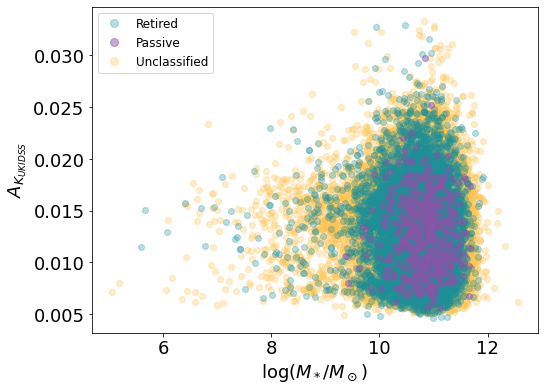

In [40]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['A_K_UKIDSS'], ls='', marker='o', markersize=6, 
         c=palette_darker[1], alpha=0.3, label='Retired', zorder=10)
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['A_K_UKIDSS'], ls='', marker='o', markersize=6, 
         c=palette_darker[0], alpha=0.5, label='Passive', zorder=15)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['A_K_UKIDSS'], ls='', marker='o', 
         markersize=6, c=palette_darker[2], alpha=0.3, label='Unclassified', zorder=5)

#plt.xlim(9,12)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{K_{UKIDSS}}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

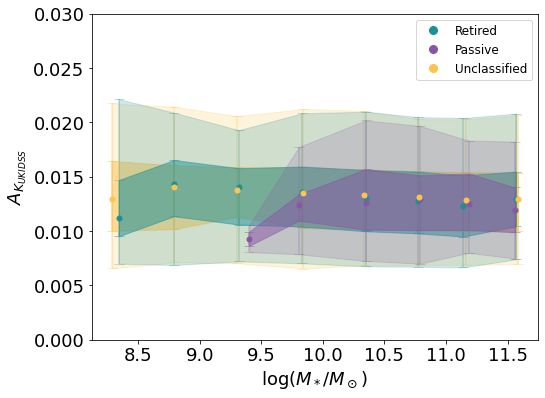

In [68]:
plt.plot(np.log10(mass_50r), A_KU_50r, ls='', marker='o', markersize=5, c=palette_darker[1], label='Retired', 
         zorder=20)
plt.plot(np.log10(mass_50p), A_KU_50p, ls='', marker='o', markersize=5, c=palette_darker[0], label='Passive', 
         zorder=20)
plt.plot(np.log10(mass_50u), A_KU_50u, ls='', marker='o', markersize=5, c=palette_darker[2], 
         label='Unclassified', zorder=20)

plt.errorbar(np.log10(mass_50r), A_KU_50r, 
             yerr=[np.array(A_KU_50r)-np.array(A_KU_025r), np.array(A_KU_975r)-np.array(A_KU_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.3)
plt.errorbar(np.log10(mass_50r), A_KU_50r, 
             yerr=[np.array(A_KU_50r)-np.array(A_KU_25r), np.array(A_KU_75r)-np.array(A_KU_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.5)

plt.fill_between(np.log10(mass_50r), A_KU_25r, A_KU_75r, color=palette[1], alpha=0.5, zorder=10)
plt.fill_between(np.log10(mass_50r), A_KU_025r, A_KU_975r, color=palette[1], alpha=0.2, zorder=10)

plt.errorbar(np.log10(mass_50p), A_KU_50p, 
             yerr=[np.array(A_KU_50p)-np.array(A_KU_025p), np.array(A_KU_975p)-np.array(A_KU_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.3)
plt.errorbar(np.log10(mass_50p), A_KU_50p, 
             yerr=[np.array(A_KU_50p)-np.array(A_KU_25p), np.array(A_KU_75p)-np.array(A_KU_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.5)

plt.fill_between(np.log10(mass_50p), A_KU_25p, A_KU_75p, color=palette[0], alpha=0.5, zorder=15)
plt.fill_between(np.log10(mass_50p), A_KU_025p, A_KU_975p, color=palette[0], alpha=0.2, zorder=15)

plt.errorbar(np.log10(mass_50u), A_KU_50u, 
             yerr=[np.array(A_KU_50u)-np.array(A_KU_025u), np.array(A_KU_975u)-np.array(A_KU_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.3)
plt.errorbar(np.log10(mass_50u), A_KU_50u, 
             yerr=[np.array(A_KU_50u)-np.array(A_KU_25u), np.array(A_KU_75u)-np.array(A_KU_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.5)

plt.fill_between(np.log10(mass_50u), A_KU_25u, A_KU_75u, color=palette[2], alpha=0.5, zorder=5)
plt.fill_between(np.log10(mass_50u), A_KU_025u, A_KU_975u, color=palette[2], alpha=0.2, zorder=5)

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{K_{UKIDSS}}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
plt.ylim([0,0.03])
plt.show()

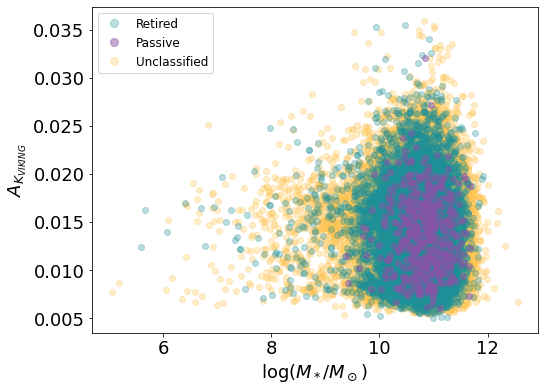

In [41]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['A_K_VIKING'], ls='', marker='o', markersize=6, 
         c=palette_darker[1], alpha=0.3, label='Retired', zorder=10)
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['A_K_VIKING'], ls='', marker='o', markersize=6, 
         c=palette_darker[0], alpha=0.5, label='Passive', zorder=15)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['A_K_VIKING'], ls='', marker='o', 
         markersize=6, c=palette_darker[2], alpha=0.3, label='Unclassified', zorder=5)

#plt.xlim(9,12)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{K_{VIKING}}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

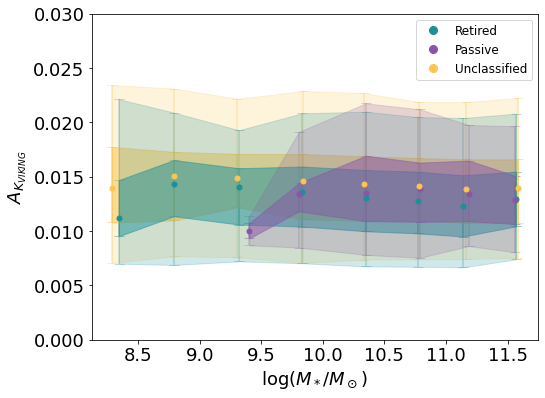

In [69]:
plt.plot(np.log10(mass_50r), A_KV_50r, ls='', marker='o', markersize=5, c=palette_darker[1], label='Retired', 
         zorder=20)
plt.plot(np.log10(mass_50p), A_KV_50p, ls='', marker='o', markersize=5, c=palette_darker[0], label='Passive', 
         zorder=20)
plt.plot(np.log10(mass_50u), A_KV_50u, ls='', marker='o', markersize=5, c=palette_darker[2], 
         label='Unclassified', zorder=20)

plt.errorbar(np.log10(mass_50r), A_KV_50r, 
             yerr=[np.array(A_KV_50r)-np.array(A_KV_025r), np.array(A_KV_975r)-np.array(A_KV_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.3)
plt.errorbar(np.log10(mass_50r), A_KV_50r, 
             yerr=[np.array(A_KV_50r)-np.array(A_KV_25r), np.array(A_KV_75r)-np.array(A_KV_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.5)

plt.fill_between(np.log10(mass_50r), A_KV_25r, A_KV_75r, color=palette[1], alpha=0.5, zorder=10)
plt.fill_between(np.log10(mass_50r), A_KV_025r, A_KV_975r, color=palette[1], alpha=0.2, zorder=10)

plt.errorbar(np.log10(mass_50p), A_KV_50p, 
             yerr=[np.array(A_KV_50p)-np.array(A_KV_025p), np.array(A_KV_975p)-np.array(A_KV_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.3)
plt.errorbar(np.log10(mass_50p), A_KV_50p, 
             yerr=[np.array(A_KV_50p)-np.array(A_KV_25p), np.array(A_KV_75p)-np.array(A_KV_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.5)

plt.fill_between(np.log10(mass_50p), A_KV_25p, A_KV_75p, color=palette[0], alpha=0.5, zorder=15)
plt.fill_between(np.log10(mass_50p), A_KV_025p, A_KV_975p, color=palette[0], alpha=0.2, zorder=15)

plt.errorbar(np.log10(mass_50u), A_KV_50u, 
             yerr=[np.array(A_KV_50u)-np.array(A_KV_025u), np.array(A_KV_975u)-np.array(A_KV_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.3)
plt.errorbar(np.log10(mass_50u), A_KV_50u, 
             yerr=[np.array(A_KV_50u)-np.array(A_KV_25u), np.array(A_KV_75u)-np.array(A_KV_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.5)

plt.fill_between(np.log10(mass_50u), A_KV_25u, A_KV_75u, color=palette[2], alpha=0.5, zorder=5)
plt.fill_between(np.log10(mass_50u), A_KV_025u, A_KV_975u, color=palette[2], alpha=0.2, zorder=5)

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{K_{VIKING}}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
plt.ylim([0,0.03])
plt.show()

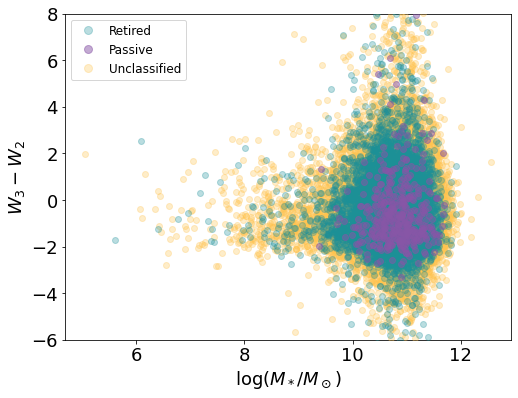

In [87]:
plt.plot(np.log10(retiredW['mass_stellar_best_fit']), retiredW['ABMagDFA_WISEW3']-retiredW['ABMagDFA_WISEW2'], 
         ls='', marker='o',  markersize=6, c=palette_darker[1], alpha=0.3, label='Retired', zorder=10)
plt.plot(np.log10(passiveW['mass_stellar_best_fit']), passiveW['ABMagDFA_WISEW3']-passiveW['ABMagDFA_WISEW2'], 
         ls='', marker='o', markersize=6, c=palette_darker[0], alpha=0.5, label='Passive', zorder=15)
plt.plot(np.log10(unclassifiedW['mass_stellar_best_fit']), 
         unclassifiedW['ABMagDFA_WISEW3']-unclassifiedW['ABMagDFA_WISEW2'], ls='', marker='o', markersize=6, 
         c=palette_darker[2], alpha=0.3, label='Unclassified', zorder=5)

#plt.xlim(9,12)
plt.ylim(-6,8)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$W_3-W_2$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

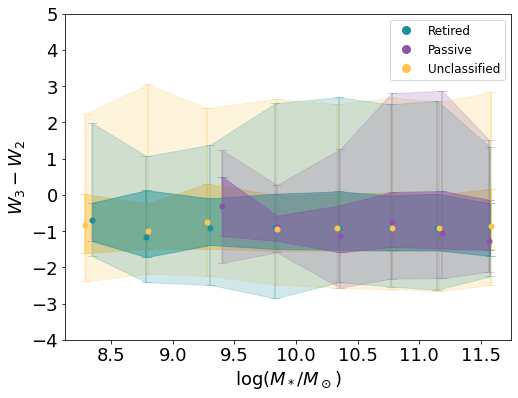

In [102]:
plt.plot(np.log10(massW_50r), W3W2_50r, ls='', marker='o', markersize=5, c=palette_darker[1], label='Retired', 
         zorder=20)
plt.plot(np.log10(massW_50p), W3W2_50p, ls='', marker='o', markersize=5, c=palette_darker[0], label='Passive', 
         zorder=20)
plt.plot(np.log10(massW_50u), W3W2_50u, ls='', marker='o', markersize=5, c=palette_darker[2], 
         label='Unclassified', zorder=20)

plt.errorbar(np.log10(massW_50r), W3W2_50r, 
             yerr=[np.array(W3W2_50r)-np.array(W3W2_025r), np.array(W3W2_975r)-np.array(W3W2_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.3)
plt.errorbar(np.log10(massW_50r), W3W2_50r, 
             yerr=[np.array(W3W2_50r)-np.array(W3W2_25r), np.array(W3W2_75r)-np.array(W3W2_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.5)

plt.fill_between(np.log10(massW_50r), W3W2_25r, W3W2_75r, color=palette[1], alpha=0.5, zorder=10)
plt.fill_between(np.log10(massW_50r), W3W2_025r, W3W2_975r, color=palette[1], alpha=0.2, zorder=10)

plt.errorbar(np.log10(massW_50p), W3W2_50p, 
             yerr=[np.array(W3W2_50p)-np.array(W3W2_025p), np.array(W3W2_975p)-np.array(W3W2_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.3)
plt.errorbar(np.log10(massW_50p), W3W2_50p, 
             yerr=[np.array(W3W2_50p)-np.array(W3W2_25p), np.array(W3W2_75p)-np.array(W3W2_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.5)

plt.fill_between(np.log10(massW_50p), W3W2_25p, W3W2_75p, color=palette[0], alpha=0.5, zorder=15)
plt.fill_between(np.log10(massW_50p), W3W2_025p, W3W2_975p, color=palette[0], alpha=0.2, zorder=15)

plt.errorbar(np.log10(massW_50u), W3W2_50u, 
             yerr=[np.array(W3W2_50u)-np.array(W3W2_025u), np.array(W3W2_975u)-np.array(W3W2_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.3)
plt.errorbar(np.log10(massW_50u), W3W2_50u, 
             yerr=[np.array(W3W2_50u)-np.array(W3W2_25u), np.array(W3W2_75u)-np.array(W3W2_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.5)

plt.fill_between(np.log10(massW_50u), W3W2_25u, W3W2_75u, color=palette[2], alpha=0.5, zorder=5)
plt.fill_between(np.log10(massW_50u), W3W2_025u, W3W2_975u, color=palette[2], alpha=0.2, zorder=5)

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$W_3-W_2$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
plt.ylim([-4,5])
plt.show()

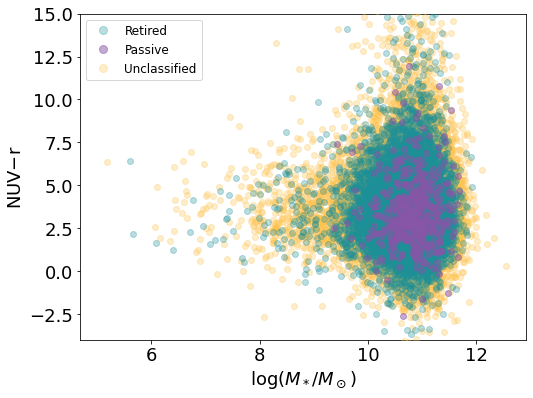

In [94]:
plt.plot(np.log10(retiredN['mass_stellar_best_fit']), retiredN['ABMagDFA_GALEXNUV']-retiredN['ABMagDFA_SDSSr'], 
         ls='', marker='o', markersize=6, c=palette_darker[1], alpha=0.3, label='Retired', zorder=10)
plt.plot(np.log10(passiveN['mass_stellar_best_fit']), passiveN['ABMagDFA_GALEXNUV']-passiveN['ABMagDFA_SDSSr'], 
         ls='', marker='o', markersize=6, c=palette_darker[0], alpha=0.5, label='Passive', zorder=15)
plt.plot(np.log10(unclassifiedN['mass_stellar_best_fit']), 
         unclassifiedN['ABMagDFA_GALEXNUV']-unclassifiedN['ABMagDFA_SDSSr'], ls='', marker='o', markersize=6, 
         c=palette_darker[2], alpha=0.3, label='Unclassified', zorder=5)

#plt.xlim(9,12)
plt.ylim(-4,15)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel('NUV$-$r')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

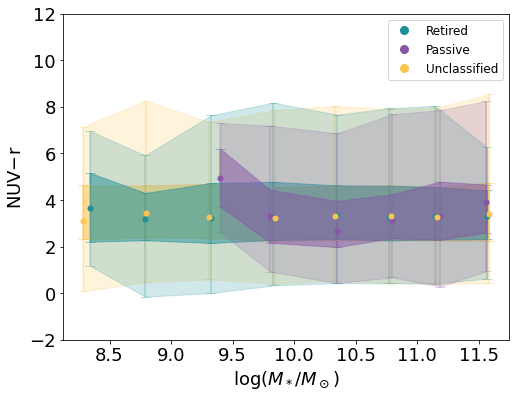

In [103]:
plt.plot(np.log10(massN_50r), NUVr_50r, ls='', marker='o', markersize=5, c=palette_darker[1], label='Retired', 
         zorder=20)
plt.plot(np.log10(massN_50p), NUVr_50p, ls='', marker='o', markersize=5, c=palette_darker[0], label='Passive', 
         zorder=20)
plt.plot(np.log10(massN_50u), NUVr_50u, ls='', marker='o', markersize=5, c=palette_darker[2], 
         label='Unclassified', zorder=20)

plt.errorbar(np.log10(massN_50r), NUVr_50r, 
             yerr=[np.array(NUVr_50r)-np.array(NUVr_025r), np.array(NUVr_975r)-np.array(NUVr_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.3)
plt.errorbar(np.log10(massN_50r), NUVr_50r, 
             yerr=[np.array(NUVr_50r)-np.array(NUVr_25r), np.array(NUVr_75r)-np.array(NUVr_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.5)

plt.fill_between(np.log10(massN_50r), NUVr_25r, NUVr_75r, color=palette[1], alpha=0.5, zorder=10)
plt.fill_between(np.log10(massN_50r), NUVr_025r, NUVr_975r, color=palette[1], alpha=0.2, zorder=10)

plt.errorbar(np.log10(massN_50p), NUVr_50p, 
             yerr=[np.array(NUVr_50p)-np.array(NUVr_025p), np.array(NUVr_975p)-np.array(NUVr_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.3)
plt.errorbar(np.log10(massN_50p), NUVr_50p, 
             yerr=[np.array(NUVr_50p)-np.array(NUVr_25p), np.array(NUVr_75p)-np.array(NUVr_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.5)

plt.fill_between(np.log10(massN_50p), NUVr_25p, NUVr_75p, color=palette[0], alpha=0.5, zorder=15)
plt.fill_between(np.log10(massN_50p), NUVr_025p, NUVr_975p, color=palette[0], alpha=0.2, zorder=15)

plt.errorbar(np.log10(massN_50u), NUVr_50u, 
             yerr=[np.array(NUVr_50u)-np.array(NUVr_025u), np.array(NUVr_975u)-np.array(NUVr_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.3)
plt.errorbar(np.log10(massN_50u), NUVr_50u, 
             yerr=[np.array(NUVr_50u)-np.array(NUVr_25u), np.array(NUVr_75u)-np.array(NUVr_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.5)

plt.fill_between(np.log10(massN_50u), NUVr_25u, NUVr_75u, color=palette[2], alpha=0.5, zorder=5)
plt.fill_between(np.log10(massN_50u), NUVr_025u, NUVr_975u, color=palette[2], alpha=0.2, zorder=5)

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel('NUV$-$r')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
plt.ylim([-2,12])
plt.show()

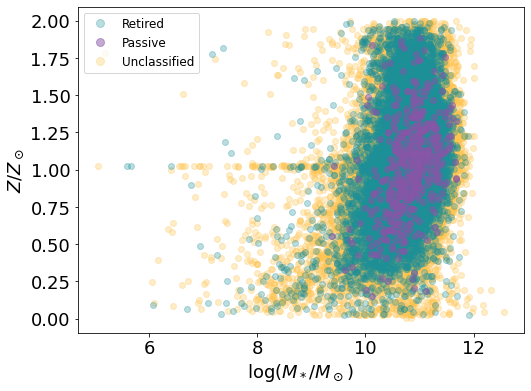

In [44]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['metalicity_Z_Zo_percentile50'], ls='', marker='o', 
         markersize=6, c=palette_darker[1], alpha=0.3, label='Retired', zorder=10)
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['metalicity_Z_Zo_percentile50'], ls='', marker='o', 
         markersize=6, c=palette_darker[0], alpha=0.5, label='Passive', zorder=15)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['metalicity_Z_Zo_percentile50'], ls='', 
         marker='o', markersize=6, c=palette_darker[2], alpha=0.3, label='Unclassified', zorder=5)

#plt.xlim(9,12)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$Z/Z_\odot$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

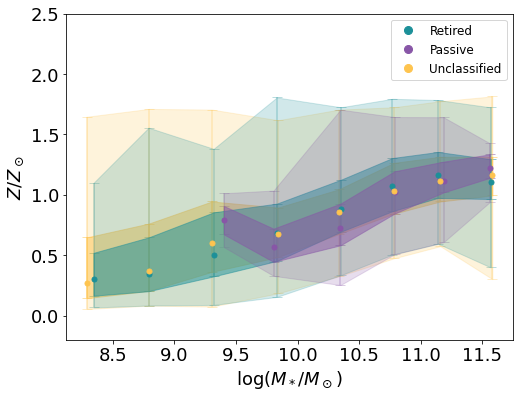

In [113]:
plt.plot(np.log10(mass_50r), Z_50r, ls='', marker='o', markersize=5, c=palette_darker[1], label='Retired', 
         zorder=20)
plt.plot(np.log10(mass_50p), Z_50p, ls='', marker='o', markersize=5, c=palette_darker[0], label='Passive', 
         zorder=20)
plt.plot(np.log10(mass_50u), Z_50u, ls='', marker='o', markersize=5, c=palette_darker[2], 
         label='Unclassified', zorder=20)

plt.errorbar(np.log10(mass_50r), Z_50r, 
             yerr=[np.array(Z_50r)-np.array(Z_025r), np.array(Z_975r)-np.array(Z_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.3)
plt.errorbar(np.log10(mass_50r), Z_50r, 
             yerr=[np.array(Z_50r)-np.array(Z_25r), np.array(Z_75r)-np.array(Z_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.5)

plt.fill_between(np.log10(mass_50r), Z_25r, Z_75r, color=palette[1], alpha=0.5, zorder=10)
plt.fill_between(np.log10(mass_50r), Z_025r, Z_975r, color=palette[1], alpha=0.2, zorder=10)

plt.errorbar(np.log10(mass_50p), Z_50p, 
             yerr=[np.array(Z_50p)-np.array(Z_025p), np.array(Z_975p)-np.array(Z_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.3)
plt.errorbar(np.log10(mass_50p), Z_50p, 
             yerr=[np.array(Z_50p)-np.array(Z_25p), np.array(Z_75p)-np.array(Z_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.5)

plt.fill_between(np.log10(mass_50p), Z_25p, Z_75p, color=palette[0], alpha=0.5, zorder=15)
plt.fill_between(np.log10(mass_50p), Z_025p, Z_975p, color=palette[0], alpha=0.2, zorder=15)

plt.errorbar(np.log10(mass_50u), Z_50u, 
             yerr=[np.array(Z_50u)-np.array(Z_025u), np.array(Z_975u)-np.array(Z_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.3)
plt.errorbar(np.log10(mass_50u), Z_50u, 
             yerr=[np.array(Z_50u)-np.array(Z_25u), np.array(Z_75u)-np.array(Z_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.5)

plt.fill_between(np.log10(mass_50u), Z_25u, Z_75u, color=palette[2], alpha=0.5, zorder=5)
plt.fill_between(np.log10(mass_50u), Z_025u, Z_975u, color=palette[2], alpha=0.2, zorder=5)

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$Z/Z_\odot$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
plt.ylim([-0.2,2.5])
plt.show()

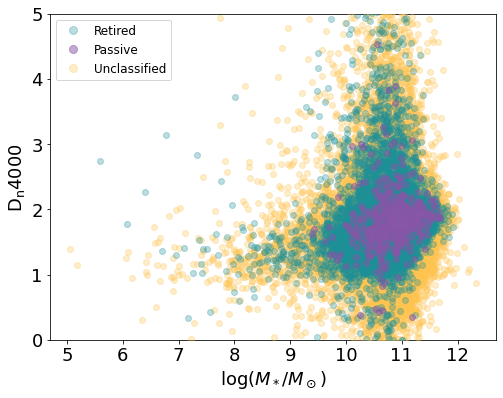

In [124]:
plt.plot(np.log10(retiredD['mass_stellar_best_fit']), retiredD['D4000N'], ls='', marker='o', 
         markersize=6, c=palette_darker[1], alpha=0.3, label='Retired', zorder=10)
plt.plot(np.log10(passiveD['mass_stellar_best_fit']), passiveD['D4000N'], ls='', marker='o', 
         markersize=6, c=palette_darker[0], alpha=0.5, label='Passive', zorder=15)
plt.plot(np.log10(unclassifiedD['mass_stellar_best_fit']), unclassifiedD['D4000N'], ls='', 
         marker='o', markersize=6, c=palette_darker[2], alpha=0.3, label='Unclassified', zorder=5)

#plt.xlim(9,12)
plt.ylim(0, 5)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'D$_\mathrm{n}4000$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

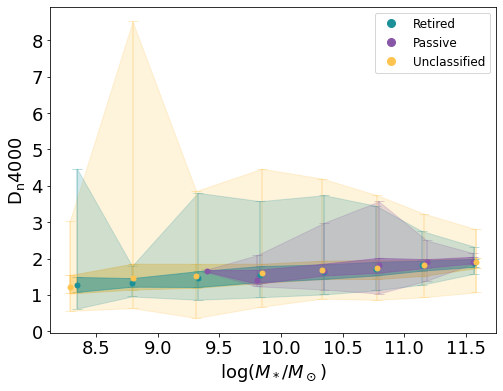

In [121]:
plt.plot(np.log10(massN_50r), Dn4000_50r, ls='', marker='o', markersize=5, c=palette_darker[1], label='Retired', 
         zorder=20)
plt.plot(np.log10(massN_50p), Dn4000_50p, ls='', marker='o', markersize=5, c=palette_darker[0], label='Passive', 
         zorder=20)
plt.plot(np.log10(massN_50u), Dn4000_50u, ls='', marker='o', markersize=5, c=palette_darker[2], 
         label='Unclassified', zorder=20)

plt.errorbar(np.log10(massN_50r), Dn4000_50r, 
             yerr=[np.array(Dn4000_50r)-np.array(Dn4000_025r), np.array(Dn4000_975r)-np.array(Dn4000_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.3)
plt.errorbar(np.log10(massN_50r), Dn4000_50r, 
             yerr=[np.array(Dn4000_50r)-np.array(Dn4000_25r), np.array(Dn4000_75r)-np.array(Dn4000_50r)], 
             capsize=5, fmt='.', c=palette_darker[1], alpha=0.5)

plt.fill_between(np.log10(massN_50r), Dn4000_25r, Dn4000_75r, color=palette[1], alpha=0.5, zorder=10)
plt.fill_between(np.log10(massN_50r), Dn4000_025r, Dn4000_975r, color=palette[1], alpha=0.2, zorder=10)

plt.errorbar(np.log10(massN_50p), Dn4000_50p, 
             yerr=[np.array(Dn4000_50p)-np.array(Dn4000_025p), np.array(Dn4000_975p)-np.array(Dn4000_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.3)
plt.errorbar(np.log10(massN_50p), Dn4000_50p, 
             yerr=[np.array(Dn4000_50p)-np.array(Dn4000_25p), np.array(Dn4000_75p)-np.array(Dn4000_50p)], 
             capsize=5, fmt='.', c=palette_darker[0], alpha=0.5)

plt.fill_between(np.log10(massN_50p), Dn4000_25p, Dn4000_75p, color=palette[0], alpha=0.5, zorder=15)
plt.fill_between(np.log10(massN_50p), Dn4000_025p, Dn4000_975p, color=palette[0], alpha=0.2, zorder=15)

plt.errorbar(np.log10(massN_50u), Dn4000_50u, 
             yerr=[np.array(Dn4000_50u)-np.array(Dn4000_025u), np.array(Dn4000_975u)-np.array(Dn4000_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.3)
plt.errorbar(np.log10(massN_50u), Dn4000_50u, 
             yerr=[np.array(Dn4000_50u)-np.array(Dn4000_25u), np.array(Dn4000_75u)-np.array(Dn4000_50u)], 
             capsize=5, fmt='.', c=palette_darker[2], alpha=0.5)

plt.fill_between(np.log10(massN_50u), Dn4000_25u, Dn4000_75u, color=palette[2], alpha=0.5, zorder=5)
plt.fill_between(np.log10(massN_50u), Dn4000_025u, Dn4000_975u, color=palette[2], alpha=0.2, zorder=5)

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'D$_\mathrm{n}4000$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
#plt.ylim([-0.2,2.5])
plt.show()

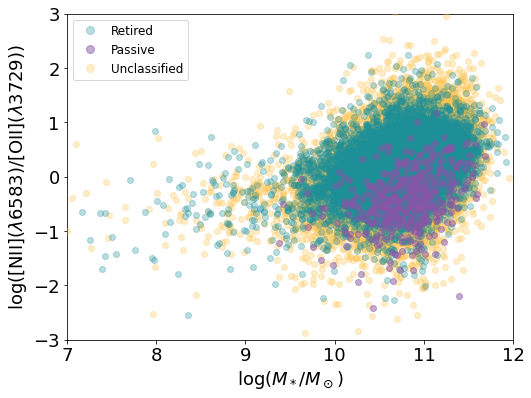

In [46]:
plt.plot(np.log10(retired_NIIR_OIIR['mass_stellar_best_fit']), 
         np.log10(retired_NIIR_OIIR['NIIR_FLUX']/retired_NIIR_OIIR['OIIR_FLUX']), 
         ls='', marker='o', markersize=6, c=palette_darker[1], alpha=0.3, label='Retired', zorder=10)
plt.plot(np.log10(passive_NIIR_OIIR['mass_stellar_best_fit']), 
         np.log10(passive_NIIR_OIIR['NIIR_FLUX']/passive_NIIR_OIIR['OIIR_FLUX']), 
         ls='', marker='o', markersize=6, c=palette_darker[0], alpha=0.5, label='Passive', zorder=15)
plt.plot(np.log10(unclassified_NIIR_OIIR['mass_stellar_best_fit']), 
         np.log10(unclassified_NIIR_OIIR['NIIR_FLUX']/unclassified_NIIR_OIIR['OIIR_FLUX']), 
         ls='', marker='o', markersize=6, c=palette_darker[2], alpha=0.3, label='Unclassified', zorder=5)

plt.xlim(7, 12)
plt.ylim(-3,3)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$\log([\mathrm{NII}](\lambda 6583)/[\mathrm{OII}](\lambda 3729))$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

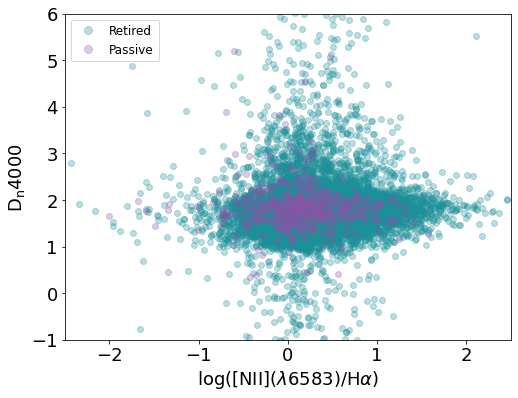

In [47]:
plt.plot(np.log10(NIIR_Ha_retired['NIIR_FLUX']/NIIR_Ha_retired['HA_FLUX']), NIIR_Ha_retired['D4000N'], ls='', 
         marker='o', markersize=6, c=palette_darker[1], alpha=0.3, label='Retired')
plt.plot(np.log10(NIIR_Ha_passive['NIIR_FLUX']/NIIR_Ha_passive['HA_FLUX']), NIIR_Ha_passive['D4000N'], ls='', 
         marker='o', markersize=6, c=palette_darker[0], alpha=0.3, label='Passive')

plt.xlim(-2.5, 2.5)
plt.ylim(-1,6)
plt.xlabel(r'$\log([\mathrm{NII}](\lambda 6583)/\mathrm{H}\alpha)$')
plt.ylabel(r'D$_\mathrm{n}4000$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
    
plt.show()

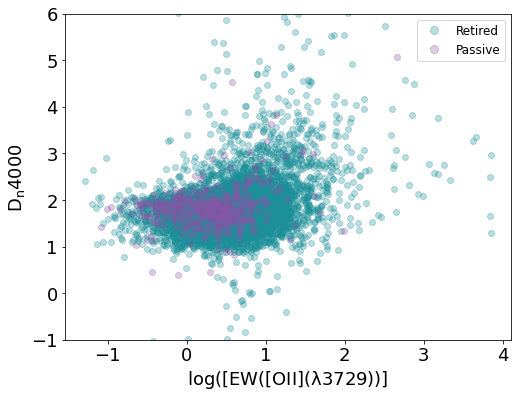

In [48]:
plt.plot(np.log10(EW_OII_retired['OIIR_EW']), EW_OII_retired['D4000N'], ls='', marker='o', markersize=6, 
         c=palette_darker[1], alpha=0.3, label='Retired')
plt.plot(np.log10(EW_OII_passive['OIIR_EW']), EW_OII_passive['D4000N'], ls='', marker='o', markersize=6, 
         c=palette_darker[0], alpha=0.3, label='Passive')

plt.ylim(-1,6)
plt.xlabel(r'$\log([\mathrm{EW([OII](\lambda 3729))}]$')
plt.ylabel(r'D$_\mathrm{n}4000$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)
    
plt.show()

# Histograms/kdeplots

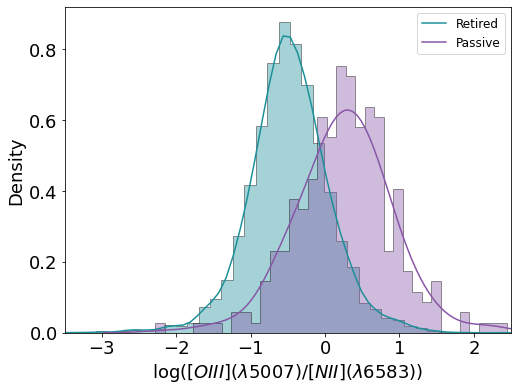

In [49]:
xr = OIIIR_NIIR_retired['OIIIR_FLUX']/OIIIR_NIIR_retired['NIIR_FLUX']
xp = OIIIR_NIIR_passive['OIIIR_FLUX']/OIIIR_NIIR_passive['NIIR_FLUX']

bins = np.linspace(min(np.log(xr)), max(np.log10(xr)), 200)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')

bins = np.linspace(min(np.log(xp)), max(np.log10(xp)), 100)

n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OIII](\lambda 5007)/[NII](\lambda 6583))$')
plt.legend()

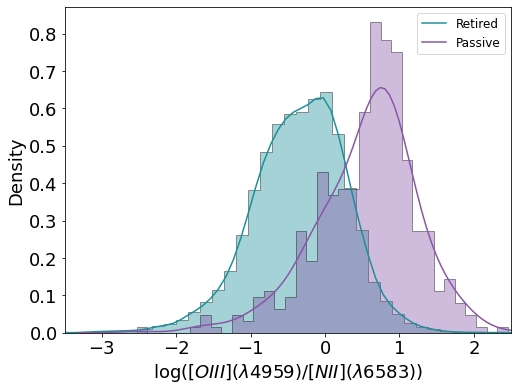

In [50]:
xr = OIIIB_NIIR_retired['OIIIB_FLUX']/OIIIB_NIIR_retired['NIIR_FLUX']
xp = OIIIB_NIIR_passive['OIIIB_FLUX']/OIIIB_NIIR_passive['NIIR_FLUX']

bins = np.linspace(min(np.log(xr)), max(np.log10(xr)), 200)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')

bins = np.linspace(min(np.log(xp)), max(np.log10(xp)), 100)

n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OIII](\lambda 4959)/[NII](\lambda 6583))$')
plt.legend()

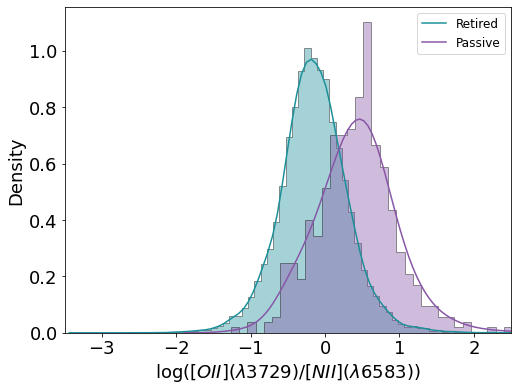

In [51]:
xr = OIIR_NIIR_retired['OIIR_FLUX']/OIIR_NIIR_retired['NIIR_FLUX']
xp = OIIR_NIIR_passive['OIIR_FLUX']/OIIR_NIIR_passive['NIIR_FLUX']

bins = np.linspace(min(np.log(xr)), max(np.log10(xr)), 200)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')

bins = np.linspace(min(np.log(xp)), max(np.log10(xp)), 100)

n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OII](\lambda 3729)/[NII](\lambda 6583))$')
plt.legend()

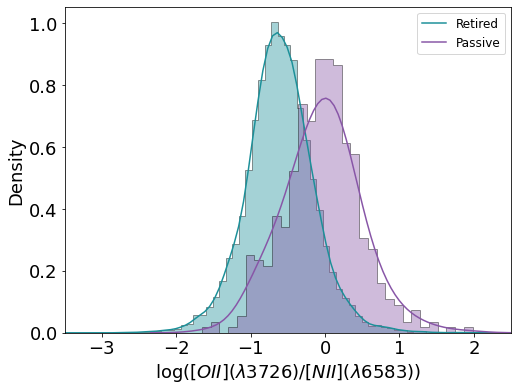

In [52]:
xr = OIIB_NIIR_retired['OIIB_FLUX']/OIIB_NIIR_retired['NIIR_FLUX']
xp = OIIB_NIIR_passive['OIIB_FLUX']/OIIB_NIIR_passive['NIIR_FLUX']

bins = np.linspace(min(np.log(xr)), max(np.log10(xr)), 200)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')

bins = np.linspace(min(np.log(xp)), max(np.log10(xp)), 100)

n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OII](\lambda 3726)/[NII](\lambda 6583))$')
plt.legend()

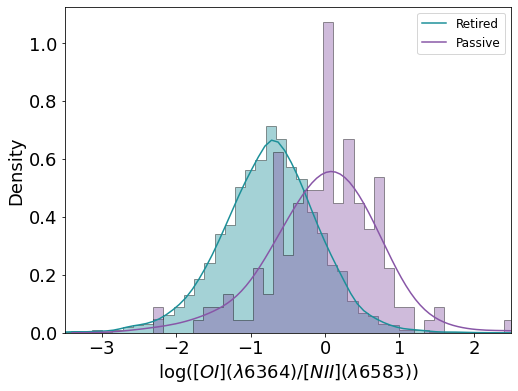

In [53]:
xr = OIR_NIIR_retired['OIR_FLUX']/OIR_NIIR_retired['NIIR_FLUX']
xp = OIR_NIIR_passive['OIR_FLUX']/OIR_NIIR_passive['NIIR_FLUX']

bins = np.linspace(min(np.log(xr)), max(np.log10(xr)), 200)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')

bins = np.linspace(min(np.log(xp)), max(np.log10(xp)), 100)

n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OI](\lambda 6364)/[NII](\lambda 6583))$')
plt.legend()

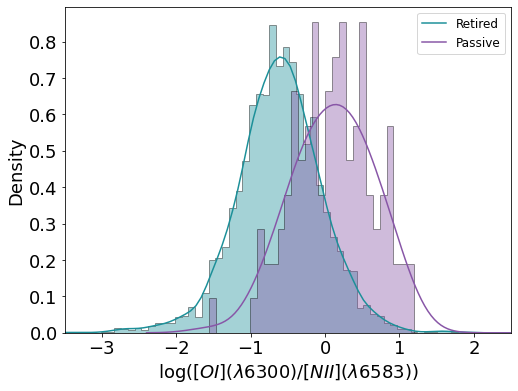

In [54]:
xr = OIB_NIIR_retired['OIB_FLUX']/OIR_NIIR_retired['NIIR_FLUX']
xp = OIB_NIIR_passive['OIB_FLUX']/OIR_NIIR_passive['NIIR_FLUX']

bins = np.linspace(min(np.log(xr)), max(np.log10(xr)), 200)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')

bins = np.linspace(min(np.log(xp)), max(np.log10(xp)), 100)

n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OI](\lambda 6300)/[NII](\lambda 6583))$')
plt.legend()

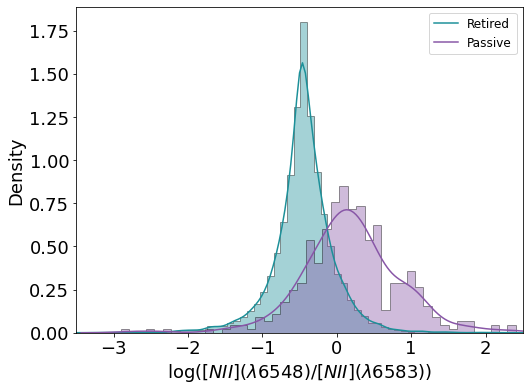

In [55]:
xr = NIIB_NIIR_retired['NIIB_FLUX']/NIIB_NIIR_retired['NIIR_FLUX']
xp = NIIB_NIIR_passive['NIIB_FLUX']/NIIB_NIIR_passive['NIIR_FLUX']

bins = np.linspace(min(np.log(xr)), max(np.log10(xr)), 150)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')

bins = np.linspace(min(np.log(xp)), max(np.log10(xp)), 80)

n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([NII](\lambda 6548)/[NII](\lambda 6583))$')
plt.legend()

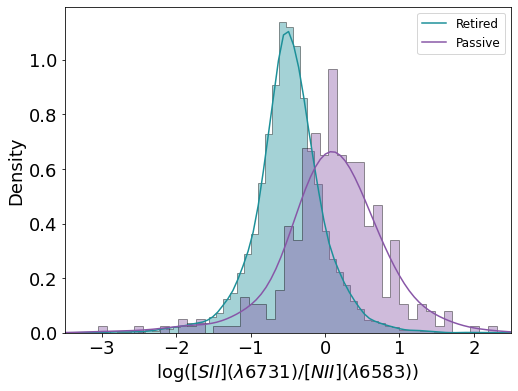

In [56]:
xr = SIIR_NIIR_retired['SIIR_FLUX']/SIIR_NIIR_retired['NIIR_FLUX']
xp = SIIR_NIIR_passive['SIIR_FLUX']/SIIR_NIIR_passive['NIIR_FLUX']

bins = np.linspace(min(np.log(xr)), max(np.log10(xr)), 200)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')

bins = np.linspace(min(np.log(xp)), max(np.log10(xp)), 130)

n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([SII](\lambda 6731)/[NII](\lambda 6583))$')
plt.legend()

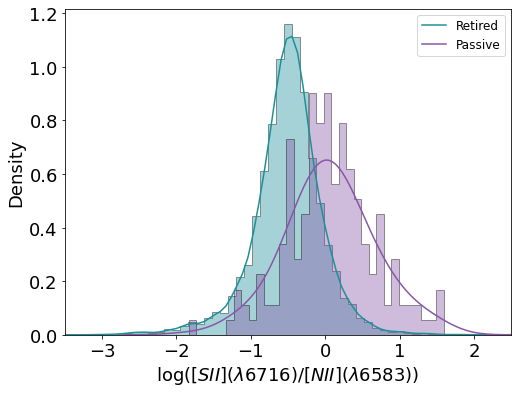

In [57]:
xr = SIIB_NIIR_retired['SIIB_FLUX']/SIIR_NIIR_retired['NIIR_FLUX']
xp = SIIB_NIIR_passive['SIIB_FLUX']/SIIR_NIIR_passive['NIIR_FLUX']

bins = np.linspace(min(np.log(xr)), max(np.log10(xr)), 200)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')

bins = np.linspace(min(np.log(xp)), max(np.log10(xp)), 100)

n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([SII](\lambda 6716)/[NII](\lambda 6583))$')
plt.legend()

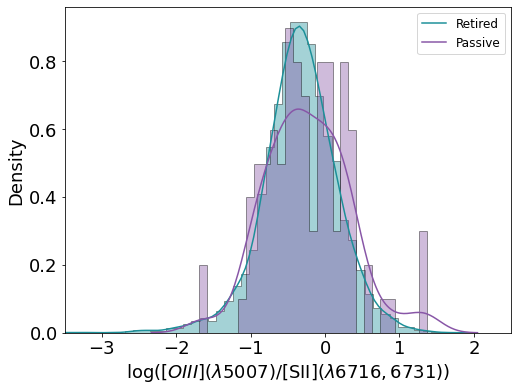

In [58]:
xr = OIIIR_SII_retired['OIIIR_FLUX']/(OIIIR_SII_retired['SIIR_FLUX']+OIIIR_SII_retired['SIIB_FLUX'])
xp = OIIIR_SII_passive['OIIIR_FLUX']/(OIIIR_SII_passive['SIIR_FLUX']+OIIIR_SII_passive['SIIB_FLUX'])

bins = np.linspace(min(np.log(xr)), max(np.log10(xr)), 200)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')

bins = np.linspace(min(np.log(xp)), max(np.log10(xp)), 50)

n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OIII](\lambda 5007)/[\mathrm{SII}](\lambda 6716,6731))$')
plt.legend()

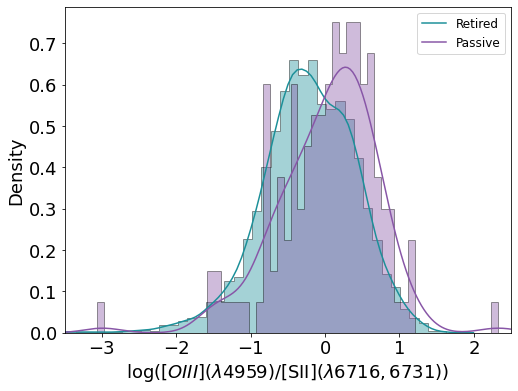

In [59]:
xr = OIIIB_SII_retired['OIIIB_FLUX']/(OIIIB_SII_retired['SIIR_FLUX']+OIIIB_SII_retired['SIIB_FLUX'])
xp = OIIIB_SII_passive['OIIIB_FLUX']/(OIIIB_SII_passive['SIIR_FLUX']+OIIIB_SII_passive['SIIB_FLUX'])

bins = np.linspace(min(np.log(xr)), max(np.log10(xr)), 200)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')

bins = np.linspace(min(np.log(xp)), max(np.log10(xp)), 100)

n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OIII](\lambda 4959)/[\mathrm{SII}](\lambda 6716,6731))$')
plt.legend()

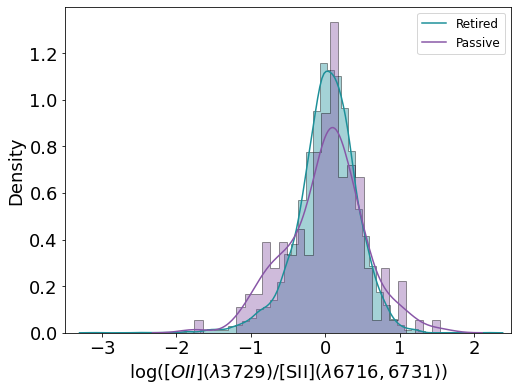

In [60]:
xr = OIIR_SII_retired['OIIR_FLUX']/(OIIR_SII_retired['SIIR_FLUX']+OIIR_SII_retired['SIIB_FLUX'])
xp = OIIR_SII_passive['OIIR_FLUX']/(OIIR_SII_passive['SIIR_FLUX']+OIIR_SII_passive['SIIB_FLUX'])

bins = np.linspace(min(np.log(xr)), max(np.log10(xr)), 100)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')

bins = np.linspace(min(np.log(xp)), max(np.log10(xp)), 50)

n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OII](\lambda 3729)/[\mathrm{SII}](\lambda 6716,6731))$')
plt.legend()

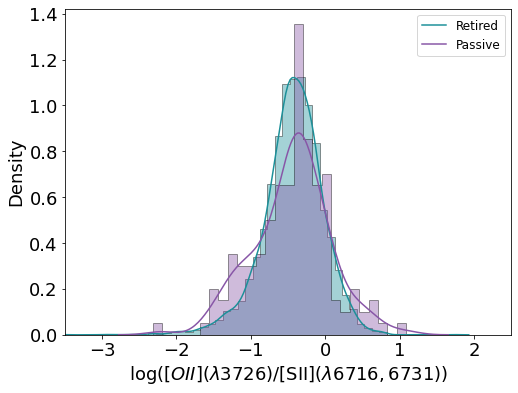

In [61]:
xr = OIIB_SII_retired['OIIB_FLUX']/(OIIB_SII_retired['SIIR_FLUX']+OIIB_SII_retired['SIIB_FLUX'])
xp = OIIB_SII_passive['OIIB_FLUX']/(OIIB_SII_passive['SIIR_FLUX']+OIIB_SII_passive['SIIB_FLUX'])

bins = np.linspace(min(np.log(xr)), max(np.log10(xr)), 100)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')

bins = np.linspace(min(np.log(xp)), max(np.log10(xp)), 50)

n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OII](\lambda 3726)/[\mathrm{SII}](\lambda 6716,6731))$')
plt.legend()

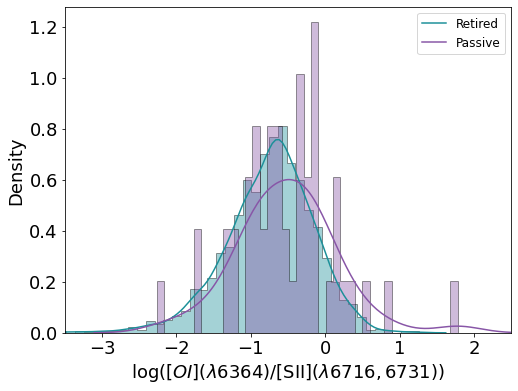

In [62]:
xr = OIR_SII_retired['OIR_FLUX']/(OIR_SII_retired['SIIR_FLUX']+OIR_SII_retired['SIIB_FLUX'])
xp = OIR_SII_passive['OIR_FLUX']/(OIR_SII_passive['SIIR_FLUX']+OIR_SII_passive['SIIB_FLUX'])

bins = np.linspace(min(np.log(xr)), max(np.log10(xr)), 150)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')

bins = np.linspace(min(np.log(xp)), max(np.log10(xp)), 70)

n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OI](\lambda 6364)/[\mathrm{SII}](\lambda 6716,6731))$')
plt.legend()

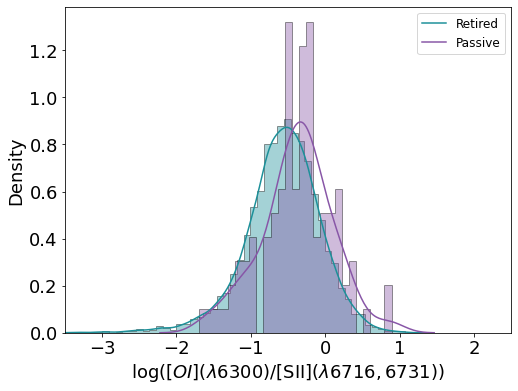

In [63]:
xr = OIB_SII_retired['OIB_FLUX']/(OIB_SII_retired['SIIR_FLUX']+OIB_SII_retired['SIIB_FLUX'])
xp = OIB_SII_passive['OIB_FLUX']/(OIB_SII_passive['SIIR_FLUX']+OIB_SII_passive['SIIB_FLUX'])

bins = np.linspace(min(np.log(xr)), max(np.log10(xr)), 100)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')

bins = np.linspace(min(np.log(xp)), max(np.log10(xp)), 50)

n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OI](\lambda 6300)/[\mathrm{SII}](\lambda 6716,6731))$')
plt.legend()

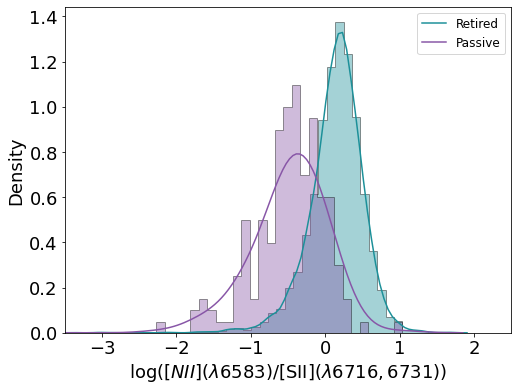

In [64]:
xr = NIIR_SII_retired['NIIR_FLUX']/(NIIR_SII_retired['SIIR_FLUX']+NIIR_SII_retired['SIIB_FLUX'])
xp = NIIR_SII_passive['NIIR_FLUX']/(NIIR_SII_passive['SIIR_FLUX']+NIIR_SII_passive['SIIB_FLUX'])

bins = np.linspace(min(np.log(xr)), max(np.log10(xr)), 200)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')

bins = np.linspace(min(np.log(xp)), max(np.log10(xp)), 140)

n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([NII](\lambda 6583)/[\mathrm{SII}](\lambda 6716,6731))$')
plt.legend()

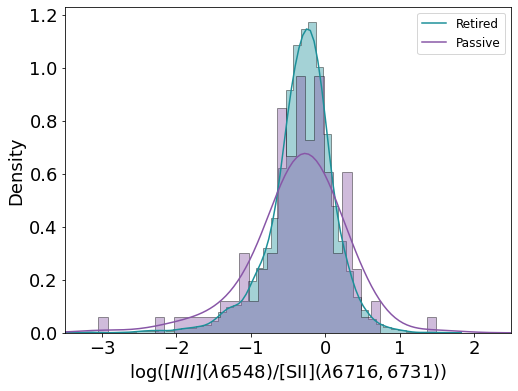

In [65]:
xr = NIIB_SII_retired['NIIB_FLUX']/(NIIB_SII_retired['SIIR_FLUX']+NIIB_SII_retired['SIIB_FLUX'])
xp = NIIB_SII_passive['NIIB_FLUX']/(NIIB_SII_passive['SIIR_FLUX']+NIIB_SII_passive['SIIB_FLUX'])

bins = np.linspace(min(np.log(xr)), max(np.log10(xr)), 200)

n, bins, patches = plt.hist(np.log10(xr), color=palette[1], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xr), color=palette_darker[1], label='Retired')

bins = np.linspace(min(np.log(xp)), max(np.log10(xp)), 140)

n, bins, patches = plt.hist(np.log10(xp), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(xp), color=palette_darker[0], label='Passive')

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([NII](\lambda 6548)/[\mathrm{SII}](\lambda 6716,6731))$')
plt.legend()